#**‚òïüìà An√°lise de Dados de Caf√©**

Dataset fornece dados sobre produ√ß√£o, exporta√ß√£o, importa√ß√£o e consumo de caf√©.

Os datasets foram disponibilizados no [Kaggle](https://www.kaggle.com/datasets/michals22/coffee-dataset?select=Coffee_import.csv) cuja a fonte √© o site oficial da ICO : https://www.ico.org/new_historical.asp



**Objetivo desse projeto:**

* Entender como o mercado de comercializa√ß√£o do caf√© evoluiu ao longo destes 30 anos analisados.

* Identificar oportunidades de crescimento na participa√ß√£o do Brasil no mercado do caf√©.



## üü† Etapas de ETL üü†

O que foi feito:

*1. Carregar os CSVs necessarios* ‚úÖ

*2. Transportar as tabelas (de wide para long)* ‚úÖ

*3. Corrigir nomes de pa√≠ses* ‚úÖ

*4. Mesclar com o dataframe de continentes* ‚úÖ

*5. Verificar paises se h√° paises sem contimentes associado* ‚úÖ

*6. Verificar outliers (nulos, negativos,...)* ‚úÖ


üü† Importa√ß√£o das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

üü† Carregamento dos datasets

In [2]:
# dataset : Coffee Production
file_path = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_production.csv'
dfp = pd.read_csv(file_path, sep = ',', encoding='ISO-8859-1')
print(f"Coffee Production:")
display(dfp.head())

# Dataset com a lista de paises e continentes
file_path1 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Countries-Continents.csv'
df_continent = pd.read_csv(file_path1, sep = ',', encoding='ISO-8859-1')
print(f"\nContinentes")
display(df_continent.head())

# dataset : Coffee Export
file_path2 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_export.csv'
dfce =  pd.read_csv(file_path2, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Export")
display(dfce.head())


# dataset : Coffee Consumption
file_path3 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_domestic_consumption.csv'
dfcc = pd.read_csv(file_path3, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Consumption")
display(dfcc.head())

# dataset : Coffee Import
file_path4 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_import.csv'
dfci = pd.read_csv(file_path4, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Import")
display(dfci.head())

# dataset : Coffee Importers Consumption
file_path5 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_importers_consumption.csv'
dfcic = pd.read_csv(file_path5, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee Importers Consumption")
display(dfcic.head())

# dataset : Coffee re export -- paises que importam caf√© para exportar para outros pa√≠ses vizinhos
file_path6 = 'https://raw.githubusercontent.com/juliafarah/coffee-eda/refs/heads/main/Coffee_re_export.csv'
dfcree = pd.read_csv(file_path6, sep = ',', encoding='ISO-8859-1')
print(f"\nCoffee re export")
display(dfcree.head())

Coffee Production:


Country      Coffee type       1990/91  \
0                            Angola  Robusta/Arabica  3.000000e+06   
1  Bolivia (Plurinational State of)          Arabica  7.380000e+06   
2                            Brazil  Arabica/Robusta  1.637160e+09   
3                           Burundi  Arabica/Robusta  2.922000e+07   
4                           Ecuador  Arabica/Robusta  9.024000e+07   

        1991/92       1992/93       1993/94       1994/95       1995/96  \
0  4.740000e+06  4.680000e+06  1.980000e+06  4.620000e+06  3.720000e+06   
1  6.240000e+06  7.200000e+06  3.060000e+06  7.020000e+06  8.520000e+06   
2  1.637580e+09  2.076180e+09  1.690020e+09  1.691520e+09  1.083600e+09   
3  4.002000e+07  3.720000e+07  2.358000e+07  3.984000e+07  2.604000e+07   
4  1.274400e+08  7.110000e+07  1.241400e+08  1.425600e+08  1.132800e+08   

        1996/97       1997/98  ...       2011/12       2012/13       2013/14  \
0  4.260000e+06  3.840000e+06  ...  1.740000e+06  1.980000e+06  2.100000e+06   
1  7.500000e+06  8.460000e+06  ...  7.920000e+06  6.300000e+06  7.200000e+06   
2  1.751820e+09  1.568880e+09  ...  2.915520e+09  3.325080e+09  3.281340e+09   
3  2.406000e+07  1.500000e+07  ...  1.224000e+07  2.436000e+07  9.780000e+06   
4  1.195800e+08  7.146000e+07  ...  4.950000e+07  4.968000e+07  3.996000e+07   

        2014/15       2015/16       2016/17       2017/18       2018/19  \
0  2.340000e+06  2.460000e+06  2.700000e+06  2.100000e+06  2.520000e+06   
1  6.000000e+06  5.040000e+06  4.680000e+06  5.040000e+06  4.980000e+06   
2  3.198300e+09  3.172260e+09  3.407280e+09  3.164400e+09  3.907860e+09   
3  1.488000e+07  1.614000e+07  1.176000e+07  1.212000e+07  1.224000e+07   
4  3.864000e+07  3.864000e+07  3.870000e+07  3.744000e+07  2.976000e+07   

        2019/20  Total_production  
0  3.120000e+06      8.208000e+07  
1  4.860000e+06      2.070000e+08  
2  3.492660e+09      7.508298e+10  
3  1.632000e+07      6.236400e+08  
4  3.354000e+07      1.900380e+09  

[5 rows x 33 columns]


Continentes


Continent   Country
0    Africa   Algeria
1    Africa    Angola
2    Africa     Benin
3    Africa  Botswana
4    Africa   Burkina


Coffee Export


Country        1990        1991        1992  \
0                            Angola     5040000     4260000     4800000   
1  Bolivia (Plurinational State of)     9360000     4440000     5760000   
2                            Brazil  1016160000  1270980000  1127460000   
3                           Burundi    35100000    41280000    38760000   
4                          Cameroon   156660000   105120000    98760000   

         1993        1994       1995       1996        1997        1998  ...  \
0     2340000      480000    2460000    3120000     3000000     3240000  ...   
1     2820000     5040000    5640000    7380000     6660000     5820000  ...   
2  1070280000  1036380000  868080000  915060000  1008060000  1088640000  ...   
3    25080000    30480000   31680000   13440000    31740000    22440000  ...   
4    42300000    32760000   24420000   33840000    82080000    44760000  ...   

         2011        2012        2013        2014        2015        2016  \
0      480000      480000      360000      540000      660000      660000   
1     4440000     3780000     3300000     3720000     1800000     1320000   
2  2028360000  1712940000  1899060000 -2147483648 -2147483648  2056140000   
3    13080000    23520000    11700000    15120000    13800000    12240000   
4    29400000    37320000    16320000    22500000    23400000    16860000   

         2017        2018        2019  Total_export  
0      540000      540000     1380000      43320000  
1     1560000     1320000     1200000     137460000  
2  1855500000  2138220000 -2147483648   33807709056  
3    10140000    12120000    17580000     646200000  
4    14700000    17220000    15000000    1399920000  

[5 rows x 32 columns]


Coffee Consumption


Country      Coffee type    1990/91    1991/92  \
0                            Angola  Robusta/Arabica    1200000    1800000   
1  Bolivia (Plurinational State of)          Arabica    1500000    1620000   
2                            Brazil  Arabica/Robusta  492000000  510000000   
3                           Burundi  Arabica/Robusta     120000      96000   
4                           Ecuador  Arabica/Robusta   21000000   21000000   

     1992/93    1993/94    1994/95    1995/96    1996/97    1997/98  ...  \
0    2100000    1200000    1500000     600000    1200000    2400000  ...   
1    1650000    1710000    1770000    1830000    1890000    1950000  ...   
2  534000000  546000000  558000000  606000000  660000000  690000000  ...   
3     102000     114600     120000     120000     120000     120000  ...   
4   21000000   21000000   21000000   21000000   18000000   18000000  ...   

      2011/12     2012/13     2013/14     2014/15     2015/16     2016/17  \
0     1800000     1800000     1800000     1800000     1800000     1800000   
1     2940000     3030000     3120000     3210000     3300000     3420000   
2  1183200000  1219800000  1205100000  1219980000  1230480000  1273500000   
3      120000      120000      120000      120000      120000      120000   
4     9000000     9000000     9300000     9300000     9300000     9300000   

      2017/18     2018/19     2019/20  Total_domestic_consumption  
0     1800000     1800000     1800000                    46500000  
1     3510000     3600000     3660000                    75180000  
2  1319820000  1332000000  1320000000                 27824700000  
3      120000      120000      120000                     3412020  
4     9300000     9300000     8940000                   381540000  

[5 rows x 33 columns]


Coffee Import


Country       1990       1991       1992       1993  \
0                Austria  112800000  123480000  132360000  110160000   
1                Belgium          0          0          0          0   
2     Belgium/Luxembourg  120900000  104760000  109680000  123780000   
3               Bulgaria   16080000   12000000   10920000   23820000   
4                Croatia          0          0   10080000    9780000   

        1994       1995       1996       1997       1998  ...       2011  \
0   85020000   73860000   72600000   77640000   77580000  ...   87120000   
1          0          0          0          0          0  ...  349680000   
2  135720000  144060000  151560000  152640000  214800000  ...          0   
3   27780000   30900000   16320000   17640000   20520000  ...   28920000   
4   11580000   19200000   19320000   23100000   20340000  ...   23460000   

        2012       2013       2014       2015       2016       2017  \
0   93540000   93300000   91500000   90780000   89700000   87600000   
1  340080000  330120000  312720000  332040000  363120000  340620000   
2          0          0          0          0          0          0   
3   33600000   36540000   37260000   40920000   46740000   42420000   
4   23040000   24780000   25200000   26220000   28740000   26340000   

        2018       2019  Total_import  
0   85740000   86880000    2765760000  
1  344520000  371940000    6240540000  
2          0          0    1257900000  
3   44220000   47100000     830700000  
4   26760000   27960000     622080000  

[5 rows x 32 columns]


Coffee Importers Consumption


Country      1990      1991      1992      1993      1994  \
0                Austria  80400000  78120000  72720000  80100000  65160000   
1                Belgium         0         0         0         0         0   
2     Belgium/Luxembourg  67440000  42480000  41760000  47340000  57480000   
3               Bulgaria   6120000   1020000  10500000  19620000  21180000   
4                Croatia         0         0   8100000   7920000   9840000   

       1995      1996      1997      1998  ...      2011      2012      2013  \
0  60720000  64560000  65220000  66300000  ...  67020000  76140000  74940000   
1         0         0         0         0  ...  56040000  54900000  74700000   
2  64380000  62340000  53160000  78540000  ...         0         0         0   
3  23580000  14760000  16500000  19440000  ...  21600000  22560000  25140000   
4  17280000  18240000  21660000  19200000  ...  22020000  21600000  23220000   

       2014      2015      2016      2017      2018      2019  \
0  68100000  68160000  71580000  69720000  70320000  70380000   
1  75540000  64440000  90120000  78000000  81900000  71100000   
2         0         0         0         0         0         0   
3  22560000  24360000  27120000  24900000  25560000  25380000   
4  22080000  22500000  22800000  21660000  21600000  22860000   

   Total_import_consumption  
0                1904520000  
1                1460520000  
2                 514920000  
3                 625080000  
4                 564180000  

[5 rows x 32 columns]


Coffee re export


Country      1990      1991      1992      1993      1994  \
0                Austria  24900000  45360000  57600000  32100000  22860000   
1                Belgium         0         0         0         0         0   
2     Belgium/Luxembourg  53460000  62280000  67860000  76440000  78240000   
3               Bulgaria   9960000  10980000    420000   4200000   6600000   
4                Croatia         0         0   2040000   1860000   1800000   

       1995      1996      1997       1998  ...       2011       2012  \
0  13740000   9780000  13320000   12600000  ...   21900000   18240000   
1         0         0         0          0  ...  293640000  285240000   
2  79680000  89220000  99480000  136200000  ...          0          0   
3   7320000   1560000   1140000    1080000  ...    7320000   11040000   
4   1920000   1020000   1440000    1140000  ...    1440000    1440000   

        2013       2014       2015       2016       2017       2018  \
0   18660000   23160000   22680000   18480000   18480000   15420000   
1  255420000  237180000  267600000  273000000  262620000  262620000   
2          0          0          0          0          0          0   
3   11460000   14640000   16500000   19620000   17520000   18720000   
4    1560000    3060000    3780000    5940000    4680000    5160000   

        2019  Total_re_export  
0   16440000        869220000  
1  300840000       4779780000  
2          0        742860000  
3   21720000        205620000  
4    5160000         57900000  

[5 rows x 32 columns]

üü† **Transportar a Tabela de Produ√ß√£o**

*Transformamos o formato "wide" (anos como colunas) para "long" (uma coluna `Year`).*

1.    Loop ara os datasets que tenham a coluna de **Coffee Type**

In [3]:
# Lista de DataFrames para transpor
raw_dfs ={"production" : dfp,
          "coffee_consump" : dfcc}

# Lista de nomes das colunas de valor
col_names = {
    "production": "Production",  # Nome desejado para o valor de cada ano
    "coffee_consump": "Consumed"}


# Dicion√°rio vazio para armazenar resultados
transposed_dfs = {}


for name, df in raw_dfs.items():
    df = df.iloc[:, :-1]  # Todas as linhas, todas as colunas exceto a √∫ltima (que tem o total_*)
    # Transposi√ß√£o direta com pd.melt()
    transposed_df = pd.melt(
        df,                                  # considera todas as colunas menos a total_* (a ultuma)
        id_vars=["Country", "Coffee type"],  # Colunas fixas
        var_name="Year",                     # Nome da nova coluna de anos
        value_name=col_names[name])          # Nome da coluna de valores definida pela lista acima (Production, Exports)

    transposed_dfs[name] = transposed_df     # Salva no dicion√°rio


# Acessar DataFrames transpostos
production = transposed_dfs["production"]
coffee_consump = transposed_dfs["coffee_consump"]

# Mostrar as primeiras linhas
print("Production transposta:")
display(production.head())

print("\nCoffee Consumption transposta:")
display(coffee_consump.head())

Production transposta:


Country      Coffee type     Year    Production
0                            Angola  Robusta/Arabica  1990/91  3.000000e+06
1  Bolivia (Plurinational State of)          Arabica  1990/91  7.380000e+06
2                            Brazil  Arabica/Robusta  1990/91  1.637160e+09
3                           Burundi  Arabica/Robusta  1990/91  2.922000e+07
4                           Ecuador  Arabica/Robusta  1990/91  9.024000e+07


Coffee Consumption transposta:


Country      Coffee type     Year   Consumed
0                            Angola  Robusta/Arabica  1990/91    1200000
1  Bolivia (Plurinational State of)          Arabica  1990/91    1500000
2                            Brazil  Arabica/Robusta  1990/91  492000000
3                           Burundi  Arabica/Robusta  1990/91     120000
4                           Ecuador  Arabica/Robusta  1990/91   21000000

2. Loop ara os datasets que tenham apenas coluna de **Country** e **colunas 1990-2019** apenas

    *   Coffee Export
    *   Coffee Import
    *   Coffee Importers Consumption





In [4]:
raw_dfs2 = {"coffee_export" : dfce,
            "coffee_import" : dfci,
            "coffee_imp_consump" : dfcic,
            "coffee_reexport" : dfcree}

# Lista de nomes para a coluna de valores
col_names2 = {
    "coffee_export": "Exported",
    "coffee_import": "Imported",
    "coffee_imp_consump": "Consumed_Imp",
    "coffee_reexport" : "Re_Exported"
}

dfs_transposed = {}

for name, df in raw_dfs2.items():
  df = df.iloc[:, :-1]  # Todas as linhas, todas as colunas exceto a √∫ltima
  df_transposed = pd.melt(
      df,
      id_vars=['Country'],
      var_name='Year',
      value_name=col_names2[name])
  dfs_transposed[name] = df_transposed  # salva no dicionario dfs_transposed


# Acessar DataFrames transpostos
coffee_export = dfs_transposed["coffee_export"]
coffee_import = dfs_transposed["coffee_import"]
coffee_imp_consump = dfs_transposed["coffee_imp_consump"]
coffee_reexport = dfs_transposed["coffee_reexport"]

# Mostrar as primeiras linhas de cada df
print("Coffee Export transposta:")
display(coffee_export.head())

print("\nCoffee Import transposta:")
display(coffee_import.head())

print("\nCoffee Importers Consumption transposta:")
display(coffee_imp_consump.head())

print("\nCoffee re export transposta:")
display(coffee_reexport.head())

Coffee Export transposta:


Country  Year    Exported
0                            Angola  1990     5040000
1  Bolivia (Plurinational State of)  1990     9360000
2                            Brazil  1990  1016160000
3                           Burundi  1990    35100000
4                          Cameroon  1990   156660000


Coffee Import transposta:


Country  Year   Imported
0                Austria  1990  112800000
1                Belgium  1990          0
2     Belgium/Luxembourg  1990  120900000
3               Bulgaria  1990   16080000
4                Croatia  1990          0


Coffee Importers Consumption transposta:


Country  Year  Consumed_Imp
0                Austria  1990      80400000
1                Belgium  1990             0
2     Belgium/Luxembourg  1990      67440000
3               Bulgaria  1990       6120000
4                Croatia  1990             0


Coffee re export transposta:


Country  Year  Re_Exported
0                Austria  1990     24900000
1                Belgium  1990            0
2     Belgium/Luxembourg  1990     53460000
3               Bulgaria  1990      9960000
4                Croatia  1990            0

üü† **Padronizar nomes de pa√≠ses antes do merge com a tabela dimens√£o df_continent com as cinco tabelas fato**

* Coffee Production
* Coffee Domestic Consumption
* Coffee Export
* Coffee Import
* Coffee Importers Consumption
  




In [5]:

print("Production Countries:")
display(production['Country'].unique())

print("\nImport Consumption Countries:")
display(coffee_imp_consump['Country'].unique())

print("\nExport Countries:")
display(coffee_export['Country'].unique())

print("\nImport Countries:")
display(coffee_import['Country'].unique())

print("\nConsumption Countries:")
display(coffee_consump['Country'].unique())

print("\nRe Export Countries:")
display(coffee_reexport['Country'].unique())

Production Countries:


array(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo',
       'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania',
       'Zambia', 'Cameroon', 'Central African Republic', 'Colombia',
       'Costa Rica', "C√É¬¥te d'Ivoire", 'Democratic Republic of Congo',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica',
       'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Mexico',
       'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone',
       'Sri Lanka', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda',
       'Venezuela', 'Viet Nam', 'Yemen'], dtype=object)


Import Consumption Countries:


array(['   Austria', '   Belgium', '   Belgium/Luxembourg', '   Bulgaria',
       '   Croatia', '   Cyprus', '   Czechia', '   Denmark',
       '   Estonia', '   Finland', '   France', '   Germany', '   Greece',
       '   Hungary', '   Ireland', '   Italy', '   Latvia',
       '   Lithuania', '   Luxembourg', '   Malta', '   Netherlands',
       '   Poland', '   Portugal', '   Romania', '   Slovakia',
       '   Slovenia', '   Spain', '   Sweden', 'Japan', 'Norway',
       'Russian Federation', 'Switzerland', 'Tunisia', 'United Kingdom',
       'United States of America'], dtype=object)


Export Countries:


array(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Cameroon', 'Central African Republic', 'Colombia', 'Congo',
       'Costa Rica', "C√É¬¥te d'Ivoire", 'Cuba',
       'Democratic Republic of Congo', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Jamaica', 'Kenya',
       "Lao People's Democratic Republic", 'Liberia', 'Madagascar',
       'Malawi', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Rwanda',
       'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'Timor-Leste',
       'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela', 'Viet Nam',
       'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)


Import Countries:


array(['   Austria', '   Belgium', '   Belgium/Luxembourg', '   Bulgaria',
       '   Croatia', '   Cyprus', '   Czechia', '   Denmark',
       '   Estonia', '   Finland', '   France', '   Germany', '   Greece',
       '   Hungary', '   Ireland', '   Italy', '   Latvia',
       '   Lithuania', '   Luxembourg', '   Malta', '   Netherlands',
       '   Poland', '   Portugal', '   Romania', '   Slovakia',
       '   Slovenia', '   Spain', '   Sweden', 'Japan', 'Norway',
       'Russian Federation', 'Switzerland', 'Tunisia', 'United Kingdom',
       'United States of America'], dtype=object)


Consumption Countries:


array(['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi',
       'Ecuador', 'Indonesia', 'Madagascar', 'Malawi', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Rwanda', 'Timor-Leste', 'Zimbabwe', 'Congo',
       'Cuba', 'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania',
       'Zambia', 'Cameroon', 'Central African Republic', 'Colombia',
       'Costa Rica', "C√É¬¥te d'Ivoire", 'Democratic Republic of Congo',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Honduras', 'India', 'Jamaica',
       'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Mexico',
       'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone',
       'Sri Lanka', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda',
       'Venezuela', 'Viet Nam', 'Yemen'], dtype=object)


Re Export Countries:


array(['   Austria', '   Belgium', '   Belgium/Luxembourg', '   Bulgaria',
       '   Croatia', '   Cyprus', '   Czechia', '   Denmark',
       '   Estonia', '   Finland', '   France', '   Germany', '   Greece',
       '   Hungary', '   Ireland', '   Italy', '   Latvia',
       '   Lithuania', '   Luxembourg', '   Malta', '   Netherlands',
       '   Poland', '   Portugal', '   Romania', '   Slovakia',
       '   Slovenia', '   Spain', '   Sweden', 'Japan', 'Norway',
       'Russian Federation', 'Switzerland', 'Tunisia', 'United Kingdom',
       'United States of America'], dtype=object)

Podemos notar que os df **Production, Export e Consumption Country** tem os mesmos paises que necessitam ser padronizados.

J√° os df **Import e Imported Comsumption** ser√° necessario remover os espa√ßos antes e depois do nome do pa√≠s.

In [6]:
name_upd = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}


for name, df in name_upd.items():
    df['Country'] = df['Country'].str.strip() # remove os espa√ßos antes pra depois corrige o nome do pais

    df['Country'] = (df['Country']
                     .replace(
                              {"C√É¬¥te d'Ivoire": "Ivory Coast",
                              "Bolivia (Plurinational State of)": "Bolivia",
                              "Timor-Leste" : "East Timor",
                              "Viet Nam" : "Vietnam",
                              "Lao People's Democratic Republic" : "Laos",
                              "Democratic Republic of Congo" : "Congo",
                              "Trinidad & Tobago" : "Trinidad and Tobago",
                              "Belgium/Luxembourg" : "Luxembourg",
                              "Czechia" : "CZ",
                              "United States of America" : "US"
                              }))

    print(f"\n\n{name} padronizado:")
    display(df['Country'].unique())




production padronizado:


array(['Angola', 'Bolivia', 'Brazil', 'Burundi', 'Ecuador', 'Indonesia',
       'Madagascar', 'Malawi', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Rwanda', 'East Timor', 'Zimbabwe', 'Congo', 'Cuba',
       'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania', 'Zambia',
       'Cameroon', 'Central African Republic', 'Colombia', 'Costa Rica',
       'Ivory Coast', 'El Salvador', 'Equatorial Guinea', 'Ethiopia',
       'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'India', 'Jamaica', 'Kenya', 'Laos', 'Liberia', 'Mexico', 'Nepal',
       'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone', 'Sri Lanka',
       'Thailand', 'Togo', 'Trinidad and Tobago', 'Uganda', 'Venezuela',
       'Vietnam', 'Yemen'], dtype=object)



coffee_export padronizado:


array(['Angola', 'Bolivia', 'Brazil', 'Burundi', 'Cameroon',
       'Central African Republic', 'Colombia', 'Congo', 'Costa Rica',
       'Ivory Coast', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Jamaica', 'Kenya', 'Laos', 'Liberia', 'Madagascar',
       'Malawi', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Rwanda',
       'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'East Timor',
       'Togo', 'Trinidad and Tobago', 'Uganda', 'Venezuela', 'Vietnam',
       'Yemen', 'Zambia', 'Zimbabwe'], dtype=object)



coffee_consump padronizado:


array(['Angola', 'Bolivia', 'Brazil', 'Burundi', 'Ecuador', 'Indonesia',
       'Madagascar', 'Malawi', 'Papua New Guinea', 'Paraguay', 'Peru',
       'Rwanda', 'East Timor', 'Zimbabwe', 'Congo', 'Cuba',
       'Dominican Republic', 'Haiti', 'Philippines', 'Tanzania', 'Zambia',
       'Cameroon', 'Central African Republic', 'Colombia', 'Costa Rica',
       'Ivory Coast', 'El Salvador', 'Equatorial Guinea', 'Ethiopia',
       'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'India', 'Jamaica', 'Kenya', 'Laos', 'Liberia', 'Mexico', 'Nepal',
       'Nicaragua', 'Nigeria', 'Panama', 'Sierra Leone', 'Sri Lanka',
       'Thailand', 'Togo', 'Trinidad and Tobago', 'Uganda', 'Venezuela',
       'Vietnam', 'Yemen'], dtype=object)



coffee_import padronizado:


array(['Austria', 'Belgium', 'Luxembourg', 'Bulgaria', 'Croatia',
       'Cyprus', 'CZ', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan',
       'Norway', 'Russian Federation', 'Switzerland', 'Tunisia',
       'United Kingdom', 'US'], dtype=object)



coffee_imp_consump padronizado:


array(['Austria', 'Belgium', 'Luxembourg', 'Bulgaria', 'Croatia',
       'Cyprus', 'CZ', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan',
       'Norway', 'Russian Federation', 'Switzerland', 'Tunisia',
       'United Kingdom', 'US'], dtype=object)



coffee_reexport padronizado:


array(['Austria', 'Belgium', 'Luxembourg', 'Bulgaria', 'Croatia',
       'Cyprus', 'CZ', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Malta', 'Netherlands', 'Poland', 'Portugal',
       'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan',
       'Norway', 'Russian Federation', 'Switzerland', 'Tunisia',
       'United Kingdom', 'US'], dtype=object)

‚ÄºÔ∏è**Belgium/Luxembourg** foi substituido por Luxembourg visto que se tornou um pa√≠s independente da Belgica desde a Revolu√ß√£o Belga de 1830‚Äì1831. Logo como s√£o na√ß√µes indenpendentes, n√£o √© coerente unific√°-las como um s√≥ pa√≠s.

-----------------------------

‚ÄºÔ∏è No arquivo de country-continent.csv **Czechia est√° nomeada como CZ** e **United States of America est√° nomeada como apenas US**.
Portanto, para padronizar esses dois paises ao df_continent, ambos os paises foram ajustados para que o continente seja associado corretamente a esses dois paises.



üü† **Mesclar com o dataframe de continentes e verificar paises sem contimentes associado**

In [7]:
to_merge = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}

for name, df in to_merge.items():
  to_merge[name] = pd.merge(
      df,
      df_continent,
      on='Country',
      how='left')

  print(f"\n\n{name} merged:")
  display(to_merge[name].head())



production merged:


Country      Coffee type     Year    Production      Continent
0   Angola  Robusta/Arabica  1990/91  3.000000e+06         Africa
1  Bolivia          Arabica  1990/91  7.380000e+06  South America
2   Brazil  Arabica/Robusta  1990/91  1.637160e+09  South America
3  Burundi  Arabica/Robusta  1990/91  2.922000e+07         Africa
4  Ecuador  Arabica/Robusta  1990/91  9.024000e+07  South America



coffee_export merged:


Country  Year    Exported      Continent
0    Angola  1990     5040000         Africa
1   Bolivia  1990     9360000  South America
2    Brazil  1990  1016160000  South America
3   Burundi  1990    35100000         Africa
4  Cameroon  1990   156660000         Africa



coffee_consump merged:


Country      Coffee type     Year   Consumed      Continent
0   Angola  Robusta/Arabica  1990/91    1200000         Africa
1  Bolivia          Arabica  1990/91    1500000  South America
2   Brazil  Arabica/Robusta  1990/91  492000000  South America
3  Burundi  Arabica/Robusta  1990/91     120000         Africa
4  Ecuador  Arabica/Robusta  1990/91   21000000  South America



coffee_import merged:


Country  Year   Imported Continent
0     Austria  1990  112800000    Europe
1     Belgium  1990          0    Europe
2  Luxembourg  1990  120900000    Europe
3    Bulgaria  1990   16080000    Europe
4     Croatia  1990          0    Europe



coffee_imp_consump merged:


Country  Year  Consumed_Imp Continent
0     Austria  1990      80400000    Europe
1     Belgium  1990             0    Europe
2  Luxembourg  1990      67440000    Europe
3    Bulgaria  1990       6120000    Europe
4     Croatia  1990             0    Europe



coffee_reexport merged:


Country  Year  Re_Exported Continent
0     Austria  1990     24900000    Europe
1     Belgium  1990            0    Europe
2  Luxembourg  1990     53460000    Europe
3    Bulgaria  1990      9960000    Europe
4     Croatia  1990            0    Europe

‚ÄºÔ∏è √â preciso atualizar os dataframes originais (production, coffee_export,...) pois n√£o s√£o alterados automaticamente.

In [8]:
# atualizando os dataframes originais com a coluna continente

production = to_merge["production"]
coffee_export = to_merge["coffee_export"]
coffee_consump = to_merge["coffee_consump"]
coffee_import = to_merge["coffee_import"]
coffee_imp_consump = to_merge["coffee_imp_consump"]
coffee_reexport = to_merge["coffee_reexport"]

#teste:
production.head()

Country      Coffee type     Year    Production      Continent
0   Angola  Robusta/Arabica  1990/91  3.000000e+06         Africa
1  Bolivia          Arabica  1990/91  7.380000e+06  South America
2   Brazil  Arabica/Robusta  1990/91  1.637160e+09  South America
3  Burundi  Arabica/Robusta  1990/91  2.922000e+07         Africa
4  Ecuador  Arabica/Robusta  1990/91  9.024000e+07  South America

üü† Verificar se h√° pa√≠ses sem continentes associados

In [9]:
# loop para verificar pa√≠ses que n√£o tiveram correspond√™ncia no merge
no_continent = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}


for name, df in no_continent.items():
  empty_continent_countries = df[df['Continent'].isna()]['Country'].unique()

  print(f"N√∫mero de pa√≠ses sem continente: {len(empty_continent_countries)}")
  print(f"Pa√≠ses sem continente: {empty_continent_countries.tolist()}")
  if len(empty_continent_countries) > 0:
    print(f"Dataframe onde est√£o os paises sem continente: {name}\n")
  else:
      print("N√£o h√° dataframes com pa√≠ses sem continente associado.\n")


N√∫mero de pa√≠ses sem continente: 0
Pa√≠ses sem continente: []
N√£o h√° dataframes com pa√≠ses sem continente associado.

N√∫mero de pa√≠ses sem continente: 0
Pa√≠ses sem continente: []
N√£o h√° dataframes com pa√≠ses sem continente associado.

N√∫mero de pa√≠ses sem continente: 0
Pa√≠ses sem continente: []
N√£o h√° dataframes com pa√≠ses sem continente associado.

N√∫mero de pa√≠ses sem continente: 0
Pa√≠ses sem continente: []
N√£o h√° dataframes com pa√≠ses sem continente associado.

N√∫mero de pa√≠ses sem continente: 0
Pa√≠ses sem continente: []
N√£o h√° dataframes com pa√≠ses sem continente associado.

N√∫mero de pa√≠ses sem continente: 0
Pa√≠ses sem continente: []
N√£o h√° dataframes com pa√≠ses sem continente associado.



üü† Verifica√ß√£o de valores nulos

In [10]:
# loop para verificar valores nulos:
dfs = {"production": production,
            "coffee_export" : coffee_export,
            "coffee_consump" : coffee_consump,
            "coffee_import": coffee_import,
            "coffee_imp_consump" : coffee_imp_consump,
            "coffee_reexport" : coffee_reexport}


for name, df in dfs.items():
  print(f"\n\n{name} nulos:")
  display(df.isna().sum())



production nulos:


Country        0
Coffee type    0
Year           0
Production     0
Continent      0
dtype: int64



coffee_export nulos:


Country      0
Year         0
Exported     0
Continent    0
dtype: int64



coffee_consump nulos:


Country        0
Coffee type    0
Year           0
Consumed       0
Continent      0
dtype: int64



coffee_import nulos:


Country      0
Year         0
Imported     0
Continent    0
dtype: int64



coffee_imp_consump nulos:


Country         0
Year            0
Consumed_Imp    0
Continent       0
dtype: int64



coffee_reexport nulos:


Country        0
Year           0
Re_Exported    0
Continent      0
dtype: int64

‚úÖ**N√£o h√° valores nulos em nenhum dos df**

üü† Verificar os tipos de cada coluna

In [11]:
for name, df in dfs.items():
  print(f"\n\n{name} tipos de coluna:")
  display(df.dtypes)



production tipos de coluna:


Country         object
Coffee type     object
Year            object
Production     float64
Continent       object
dtype: object



coffee_export tipos de coluna:


Country      object
Year         object
Exported      int64
Continent    object
dtype: object



coffee_consump tipos de coluna:


Country        object
Coffee type    object
Year           object
Consumed        int64
Continent      object
dtype: object



coffee_import tipos de coluna:


Country      object
Year         object
Imported      int64
Continent    object
dtype: object



coffee_imp_consump tipos de coluna:


Country         object
Year            object
Consumed_Imp     int64
Continent       object
dtype: object



coffee_reexport tipos de coluna:


Country        object
Year           object
Re_Exported     int64
Continent      object
dtype: object

üü† **Transformar as colunas**

 > *Production, Exported, Imported, Consumed e Consumed_Imp ‚û° float64*

 >  *Year ‚û° int64*

In [12]:
# 1. Float --> Production, Exported, Imported, Consumed e Consumed_Imp

col_float = ["Production", "Exported", "Imported", "Consumed", "Consumed_Imp", "Re_Exported"]

for name, df in dfs.items():
    for col in col_float:
        if col in df.columns:  # Verifica se a coluna existe no DataFrame atual
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Converte para float, tratando erros

    print(f"\nTipos de coluna ap√≥s convers√£o do DataFrame: {name}")
    display(df.dtypes)



Tipos de coluna ap√≥s convers√£o do DataFrame: production


Country         object
Coffee type     object
Year            object
Production     float64
Continent       object
dtype: object


Tipos de coluna ap√≥s convers√£o do DataFrame: coffee_export


Country      object
Year         object
Exported      int64
Continent    object
dtype: object


Tipos de coluna ap√≥s convers√£o do DataFrame: coffee_consump


Country        object
Coffee type    object
Year           object
Consumed        int64
Continent      object
dtype: object


Tipos de coluna ap√≥s convers√£o do DataFrame: coffee_import


Country      object
Year         object
Imported      int64
Continent    object
dtype: object


Tipos de coluna ap√≥s convers√£o do DataFrame: coffee_imp_consump


Country         object
Year            object
Consumed_Imp     int64
Continent       object
dtype: object


Tipos de coluna ap√≥s convers√£o do DataFrame: coffee_reexport


Country        object
Year           object
Re_Exported     int64
Continent      object
dtype: object

‚ÄºÔ∏è Criei uma nova coluna chamada "Year_clean" pois a coluna Year do dataframe Prodcution e Consumption √© dado por temporada o que pode afetar posteriormente analises temporais.

Pelo fato da coluna 'Year' ser medir a temporada de produ√ß√£o de caf√© que pode ser entre anos optei por deixar a coluna com os dados originais e adicionar a coluna apenas com o ano base caso necessario para analises posteriores.

In [13]:
# # 2. Year --> int (menos a do dataframe )
year_col = {"production": production,
            "coffee_consump" : coffee_consump}

for name, df in year_col.items():
    if 'Year' in df.columns:
        df['Year_clean'] = (df["Year"]
                            .str
                            .split("/")
                            .str[0]
                            .astype(int)
                            )
    print(f"\nTipos da coluna 'Year_clen' ap√≥s convers√£o do DataFrame: {name}")
    display(df.dtypes)


Tipos da coluna 'Year_clen' ap√≥s convers√£o do DataFrame: production


Country         object
Coffee type     object
Year            object
Production     float64
Continent       object
Year_clean       int64
dtype: object


Tipos da coluna 'Year_clen' ap√≥s convers√£o do DataFrame: coffee_consump


Country        object
Coffee type    object
Year           object
Consumed        int64
Continent      object
Year_clean      int64
dtype: object

In [14]:
year_col2 = {"coffee_export": coffee_export,
            "coffee_import" : coffee_import,
            "coffee_imp_consump" : coffee_imp_consump}

for name, df in year_col2.items():
    if 'Year' in df.columns:
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
    print(f"\nTipos da coluna 'Year_clen' ap√≥s convers√£o do DataFrame: {name}")
    display(df.dtypes)



Tipos da coluna 'Year_clen' ap√≥s convers√£o do DataFrame: coffee_export


Country      object
Year          int64
Exported      int64
Continent    object
dtype: object


Tipos da coluna 'Year_clen' ap√≥s convers√£o do DataFrame: coffee_import


Country      object
Year          int64
Imported      int64
Continent    object
dtype: object


Tipos da coluna 'Year_clen' ap√≥s convers√£o do DataFrame: coffee_imp_consump


Country         object
Year             int64
Consumed_Imp     int64
Continent       object
dtype: object

üü† **Verificar valores negativos**

> *rapidamente observado antes de transpor os dataframes que o Brasil tem valores negativos na coluna de produ√ß√£o de caf√© em alguns anos.*

In [15]:
dfs_col = {"production" : "Production",
          "coffee_consump": "Consumed",
          "coffee_export": "Exported",
          "coffee_import": "Imported",
          "coffee_imp_consump": "Consumed_Imp",
           "coffee_reexport" : "Re_Exported"}

for name, df in dfs.items():
  col_name = dfs_col[name]
  if col_name in df.columns:
    negativos_count = (df[col_name] < 0).sum()
    print(f"\nTotal de valores negativos no dataframe {name}: {negativos_count}")
  else:
      print(f"N√£o h√° valores nulos no dataframe {name}")



Total de valores negativos no dataframe production: 0

Total de valores negativos no dataframe coffee_export: 3

Total de valores negativos no dataframe coffee_consump: 0

Total de valores negativos no dataframe coffee_import: 0

Total de valores negativos no dataframe coffee_imp_consump: 0

Total de valores negativos no dataframe coffee_reexport: 0


  * Descobrindo qual pais tem valor negativo:

In [16]:
coffee_export[coffee_export['Exported'] < 0]

Country  Year    Exported      Continent
1322  Brazil  2014 -2147483648  South America
1377  Brazil  2015 -2147483648  South America
1597  Brazil  2019 -2147483648  South America


> ‚ÄºÔ∏è **Os valores negativos do Brasil ser√£o substitu√≠dos pela mediana.**

*Optou-se pela mediana ao inv√©s da m√©dia porque, em conjuntos de dados assim√©tricos ou com erros extremos, como √© o caso, ela √© mais robusta. Diferentemente da m√©dia, a mediana n√£o √© influenciada por valores at√≠picos, que podem ocorrer dado que estamos analisando agricultura e picos de produ√ß√£o/exporta√ß√£o podem ocorrer exporaticamente.*

Desta forma, a confiabilidade da an√°lise √© preservada.

In [17]:
# Filtrando apenas dados do Brasil
brasil_data = coffee_export[coffee_export['Country'] == 'Brazil'].copy()

# Calculando a mediana global dos valores positivos do Brasil
valores_positivos = brasil_data[brasil_data['Exported'] > 0]['Exported']
mediana_global = np.nanmedian(valores_positivos)

# Substituindo os valores negativos pela mediana global
brasil_data.loc[brasil_data['Exported'] < 0, 'Exported'] = mediana_global

# Atualizando o DataFrame original
coffee_export.update(brasil_data)

# Verificando se ainda h√° valores negativos ou NaNs
print("Valores negativos remanescentes:",
      (coffee_export[coffee_export['Country'] == 'Brazil']['Exported'] < 0).sum())
print("NaNs remanescentes:",
      coffee_export[coffee_export['Country'] == 'Brazil']['Exported'].isna().sum())
# Verificando o valor da mediana
print(f"Mediana global das exporta√ß√µes do Brasil (valores positivos): {mediana_global:,.0f}")

# Visualizando os dados do Brasil corrigidos
display(coffee_export[coffee_export['Country']=='Brazil'])

Valores negativos remanescentes: 0
NaNs remanescentes: 0
Mediana global das exporta√ß√µes do Brasil (valores positivos): 1,571,880,000


Country  Year    Exported      Continent
2     Brazil  1990  1016160000  South America
57    Brazil  1991  1270980000  South America
112   Brazil  1992  1127460000  South America
167   Brazil  1993  1070280000  South America
222   Brazil  1994  1036380000  South America
277   Brazil  1995   868080000  South America
332   Brazil  1996   915060000  South America
387   Brazil  1997  1008060000  South America
442   Brazil  1998  1088640000  South America
497   Brazil  1999  1388940000  South America
552   Brazil  2000  1080960000  South America
607   Brazil  2001  1390320000  South America
662   Brazil  2002  1678920000  South America
717   Brazil  2003  1542660000  South America
772   Brazil  2004  1588680000  South America
827   Brazil  2005  1571880000  South America
882   Brazil  2006  1642140000  South America
937   Brazil  2007  1691040000  South America
992   Brazil  2008  1770600000  South America
1047  Brazil  2009  1822680000  South America
1102  Brazil  2010  1990020000  South America
1157  Brazil  2011  2028360000  South America
1212  Brazil  2012  1712940000  South America
1267  Brazil  2013  1899060000  South America
1322  Brazil  2014  1571880000  South America
1377  Brazil  2015  1571880000  South America
1432  Brazil  2016  2056140000  South America
1487  Brazil  2017  1855500000  South America
1542  Brazil  2018  2138220000  South America
1597  Brazil  2019  1571880000  South America

--------

# üü† Visualiza√ß√£o de Outliers atrav√©s do gr√°fico Boxplot


1. Os 6 Maiores Exportadores de Caf√© (1990-2019)

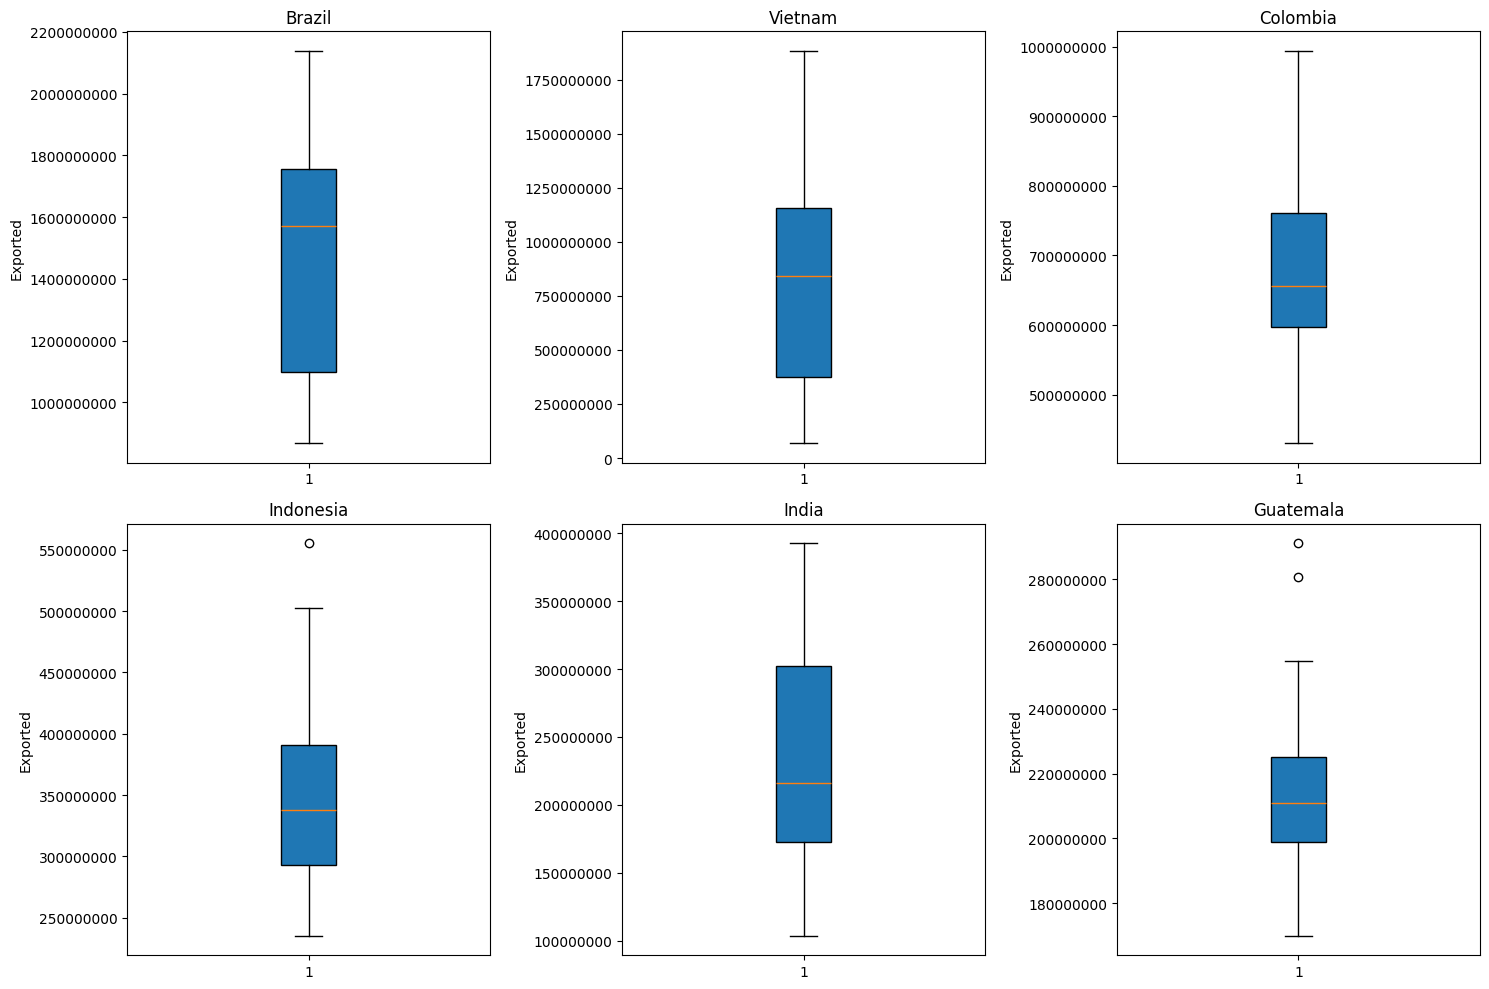

In [18]:
# 1. Calcular o total de exporta√ß√µes por pa√≠s
total_export = coffee_export.groupby('Country')['Exported'].sum()

# 2. Pegar os 5 maiores exportadores
top6_countries = total_export.nlargest(6).index.tolist()

# 3. Filtrar apenas os dados dos top 5 pa√≠ses
top5_data = coffee_export[coffee_export['Country'].isin(top6_countries)]

# 4. Criar a figura
plt.figure(figsize=(15, 10))

# 5. Plotar cada pa√≠s
for i, country in enumerate(top6_countries, 1):
    plt.subplot(2, 3, i)  # 2 linhas, 3 colunas

    # Filtrar dados do pa√≠s espec√≠fico
    country_data = top5_data[top5_data['Country'] == country]['Exported']

    # Boxplot
    plt.boxplot(country_data, patch_artist=True)
    plt.title(country)
    plt.ylabel('Exported')

    # Formatar eixos para n√∫meros grandes
    plt.ticklabel_format(style='plain', axis='y')

# 6. Ajustar layout e remover quadro vazio se necess√°rio
plt.tight_layout()
if len(top6_countries) == 7:  # Remove o 6¬∫ quadro vazio
    plt.delaxes(plt.gcf().get_axes()[-1])

plt.show()

# ‚ÄºÔ∏è

**Indonesia tem um outlier**


> Importante analisar para entender se h√° necessidade ou n√£o de trat√°-lo

Outlier detectado na Indon√©sia no ano 2013: 555,300,000
Limite superior para outliers: 539,062,500

Media de exporta√ß√£o da Indonesia (com outlier): 353,598,000
Media de exporta√ß√£o da Indonesia (sem outlier): 346,642,759
Impacto percentual da m√©dia de exporta√ß√£o da Indonesia: 1.97%



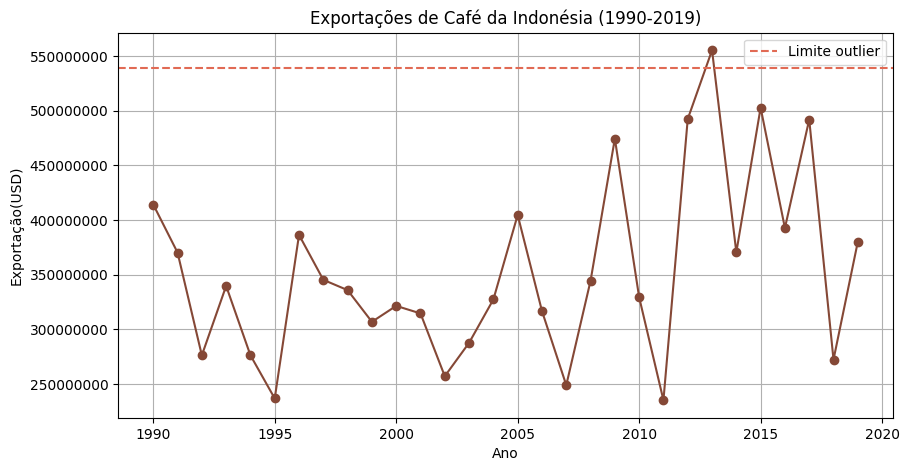

In [19]:
# Filtrar dados da Indon√©sia
indonesia_data = coffee_export[coffee_export['Country'] == 'Indonesia']['Exported']

# Calcular Q1, Q3 e IQR
q1 = indonesia_data.quantile(0.25)
q3 = indonesia_data.quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Identificar outliers
outliers = indonesia_data[indonesia_data > limite_superior]


# Pegar o primeiro outlier (mais extremo)
outlier_ano = coffee_export.loc[outliers.index[0], 'Year']
outlier_valor = outliers.iloc[0]

print(f"Outlier detectado na Indon√©sia no ano {outlier_ano}: {outlier_valor:,.0f}")
print(f"Limite superior para outliers: {limite_superior:,.0f}\n")
print(f"Media de exporta√ß√£o da Indonesia (com outlier): {indonesia_data.mean():,.0f}")

med_sem_outlier = indonesia_data[indonesia_data <= limite_superior].mean()
print(f"Media de exporta√ß√£o da Indonesia (sem outlier): {med_sem_outlier:,.0f}")

print(f"Impacto percentual da m√©dia de exporta√ß√£o da Indonesia: {((indonesia_data.mean() - med_sem_outlier) / indonesia_data.mean() * 100):.2f}%\n")

# Visualizar o comportamento da exporta√ß√£o da Indon√©sia ao longo dos anos
plt.figure(figsize=(10, 5))
plt.plot(coffee_export[coffee_export['Country'] == 'Indonesia']['Year'],
             coffee_export[coffee_export['Country'] == 'Indonesia']['Exported'],
             marker='o', color='#854836')
plt.axhline(y=limite_superior, color='#E16A54', linestyle='--', label='Limite outlier')
plt.title('Exporta√ß√µes de Caf√© da Indon√©sia (1990-2019)')
plt.ylabel('Exporta√ß√£o(USD)')
plt.xlabel('Ano')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

**Escolha do tratamento adequado do outlier da Indon√©sia:**

- Ano: 2013
- Valor original: 555,300,000
- Limite superior calculado: 539,062,500
- Impacto na an√°lise: Houve um impacto na m√©dia de exporta√ß√µes do pa√≠s de 2% neste ano podendo ser um ano at√≠pico cuja a safra teve um aumento de produ√ß√£o dada a boas condi√ß√µes climaticas daquele ano.

‚úÖ **Decis√£o: Outlier Mantido**

# ‚ÄºÔ∏è

**Guatemala tem dois outliers**


> Importante analisar para entender se h√° necessidade ou n√£o de trat√°-lo

Outliers detectados na Guatemala nos anos [1999; 2000] : [280,860,000; 291,120,000]
Limite superior para outliers: 264,195,000

Media de exporta√ß√£o da Guatemala (com outliers): 215,478,000
Media de exporta√ß√£o da Guatemala (sem outliers): 210,441,429
Impacto percentual da m√©dia de exporta√ß√£o da Guatemala: 2.34%



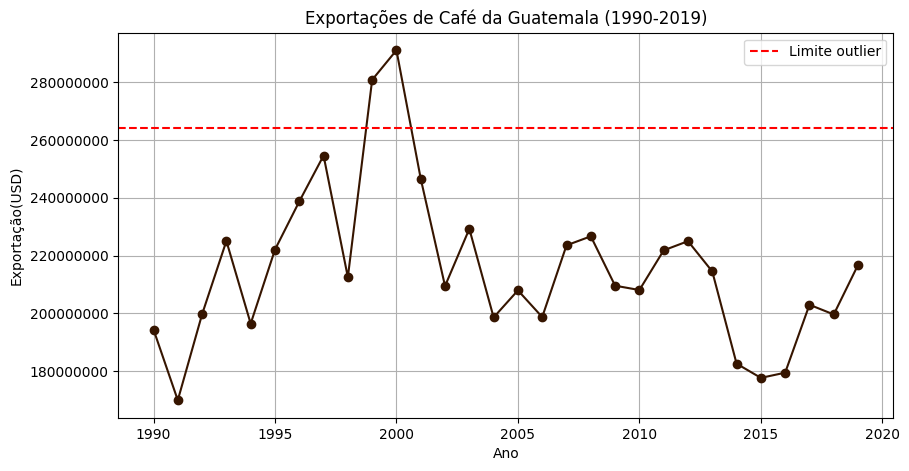

In [20]:
# Filtrar apenas os dados da Guatemala
guatemala_data = coffee_export[coffee_export['Country'] == 'Guatemala']['Exported']

# Calcular Q1, Q3 e IQR
q1 = guatemala_data.quantile(0.25)
q3 = guatemala_data.quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

# Identificar outliers
outliers = guatemala_data[guatemala_data > limite_superior]


# Pegar o primeiro outlier
outlier_ano = coffee_export.loc[outliers.index[0], 'Year']
outlier_valor = outliers.iloc[0]

# Pegar o segundo outlier
outlier_ano2 = coffee_export.loc[outliers.index[1], 'Year']
outlier_valor2 = outliers.iloc[1]

print(f"Outliers detectados na Guatemala nos anos [{outlier_ano}; {outlier_ano2}] : [{outlier_valor:,.0f}; {outlier_valor2:,.0f}]")
print(f"Limite superior para outliers: {limite_superior:,.0f}\n")
print(f"Media de exporta√ß√£o da Guatemala (com outliers): {guatemala_data.mean():,.0f}")


med_sem_outliers = guatemala_data[guatemala_data <= limite_superior].mean()
print(f"Media de exporta√ß√£o da Guatemala (sem outliers): {med_sem_outliers:,.0f}")

print(f"Impacto percentual da m√©dia de exporta√ß√£o da Guatemala: {((guatemala_data.mean() - med_sem_outliers) / guatemala_data.mean() * 100):.2f}%\n")

# Visualizar os dados da Guatemala
plt.figure(figsize=(10, 5))
plt.plot(coffee_export[coffee_export['Country'] == 'Guatemala']['Year'],
             coffee_export[coffee_export['Country'] == 'Guatemala']['Exported'],
             marker='o', color='#361500')
plt.axhline(y=limite_superior, color='r', linestyle='--', label='Limite outlier')
plt.title('Exporta√ß√µes de Caf√© da Guatemala (1990-2019)')
plt.ylabel('Exporta√ß√£o(USD)')
plt.xlabel('Ano')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

**Escolha do tratamento adequado do outlier da Guatemala:**

- Ano: 1999
- Valor original: 555,300,000
- Limite superior calculado: 539,062,500
- Impacto na an√°lise: Ambos outliers impactaram a m√©dia de exporta√ß√µes do pa√≠s em 2.37% apenas nestes anos, podendo ter sido causado por um ano at√≠pico cuja a safra teve um aumento de produ√ß√£o dada a boas condi√ß√µes climaticas daquele ano.

‚úÖ **Decis√£o: Outliers Mantidos**

-----------------------

üü† **Analisando o describe e quantas linhas e colunas de cada df**

In [21]:
for name, df in dfs.items():
  print(f"\n\nResumo estatistico de {name}")
  display(df.describe().round(0))



Resumo estatistico de production


Production  Year_clean
count  1.650000e+03      1650.0
mean   1.368090e+08      2004.0
std    3.911303e+08         9.0
min    0.000000e+00      1990.0
25%    2.280000e+06      1997.0
50%    2.103000e+07      2004.0
75%    9.264000e+07      2012.0
max    3.907860e+09      2019.0



Resumo estatistico de coffee_export


Year      Exported
count  1650.0  1.650000e+03
mean   2004.0  1.018069e+08
std       9.0  2.607256e+08
min    1990.0  0.000000e+00
25%    1997.0  1.080000e+06
50%    2004.0  8.970000e+06
75%    2012.0  8.199000e+07
max    2019.0  2.138220e+09



Resumo estatistico de coffee_consump


Consumed  Year_clean
count  1.650000e+03      1650.0
mean   3.708289e+07      2004.0
std    1.331194e+08         9.0
min    0.000000e+00      1990.0
25%    2.400000e+05      1997.0
50%    3.330000e+06      2004.0
75%    1.950000e+07      2012.0
max    1.332000e+09      2019.0



Resumo estatistico de coffee_import


Year      Imported
count  1050.0  1.050000e+03
mean   2004.0  1.689898e+08
std       9.0  2.984960e+08
min    1990.0  0.000000e+00
25%    1997.0  1.632000e+07
50%    2004.0  5.397000e+07
75%    2012.0  1.847100e+08
max    2019.0  1.851240e+09



Resumo estatistico de coffee_imp_consump


Year  Consumed_Imp
count  1050.0  1.050000e+03
mean   2004.0  1.250999e+08
std       9.0  2.348742e+08
min    1990.0  0.000000e+00
25%    1997.0  1.234500e+07
50%    2004.0  4.485000e+07
75%    2012.0  1.160250e+08
max    2019.0  1.638600e+09



Resumo estatistico de coffee_reexport


Re_Exported
count       1050.0
mean    43492800.0
std    100633450.0
min            0.0
25%      1020000.0
50%      8220000.0
75%     38520000.0
max    828060000.0

In [22]:
# verificando o numero de linas e colunas de cada df
for name, df in dfs.items():
  print(f"{name}")
  display(df.shape)


production


(1650, 6)

coffee_export


(1650, 4)

coffee_consump


(1650, 6)

coffee_import


(1050, 4)

coffee_imp_consump


(1050, 4)

coffee_reexport


(1050, 4)

> **Algumas observa√ß√µes sobre o resumo estat√≠stico :**

*adicionar observa√ß√µes*

# **üü† An√°lise Explorat√≥ria dos Dados**

# 1. An√°lise da Taxa M√©dia de Exporta√ß√£o dos 10 maiores Produtores de Caf√©

> **Objetivo** --> Identificar os maiores produtores e a taxa media de exporta√ß√£o de cada um
* Top 10 pa√≠ses em produ√ß√£o/exporta√ß√£o
* Taxa Media de Exporta√ß√£o (%) de cada um ao longo 1990-2019

In [23]:
# top10 paises produtores de caf√©:
top10_prod = (production.groupby(['Country','Continent'])['Production']
              .sum()
              .reset_index()
              .sort_values(by='Production', ascending=False)
              .head(10))

# visualiza√ß√£o - grafico de barras:
fig_prod = px.bar(
    top10_prod,
    x='Country',
    y='Production',
    labels={"Country": "Pa√≠ses",     # rotulo do eixo x
            "Production": "Total da Produ√ß√£o (USD)"}, # rotulo do eixo y
    title='Top 10 Pa√≠ses Produtores de Caf√© (1990-2019)',
    width=800, height=600,
    color='Production', # Mapeia cores aos valores (gradiente)
    #showlegend=False, # Remove a legenda
    color_continuous_scale=px.colors.sequential.Oranges) # Gradiente marrom/laranja)

fig_prod.show()

In [24]:
# top10 paises exportadores de caf√©:
top10_exp = (coffee_export.groupby(['Country','Continent'])['Exported']
              .sum()
              .reset_index()
              .sort_values(by='Exported', ascending=False)
              .head(10))

# visualiza√ß√£o - grafico de barras:
fig_exp = px.bar(
    top10_exp,
    x='Country',
    y='Exported',
    labels={"Country": "Pa√≠ses",     # rotulo do eixo x
            "Exported": "Total da Exporta√ß√£o (USD)"}, # rotulo do eixo y
    title='Top 10 Pa√≠ses Exportadores de Caf√© (1990-2019)',
    width=800, height=600,
    color='Exported', # Mapeia cores aos valores (gradiente)
    color_continuous_scale=px.colors.sequential.Reds)

fig_exp.show()

In [25]:
# top10 paises consumidores de caf√©:
top10_consump = (coffee_consump.groupby(['Country','Continent'])['Consumed']
              .sum()
              .reset_index()
              .sort_values(by='Consumed', ascending=False)
              .head(10))

# visualiza√ß√£o - grafico de barras:
fig_con = px.bar(
    top10_consump,
    x='Country',
    y='Consumed',
    labels={"Country": "Pa√≠ses",                    # rotulo do eixo x
            "Consumed": "Total de Caf√© Consumido (USD)"}, # rotulo do eixo y
    title='Top 10 Pa√≠ses Consumidores de Caf√© (1990-2019)',
    width=800, height=600,
    color='Consumed', # Mapeia cores aos valores (gradiente)
    color_continuous_scale=px.colors.sequential.Burgyl)

fig_con.show()

*** Taxa M√©dia de Exporta√ß√£o (%) dos 10 maiores produtores de Caf√©**

Onde:
> **Taxa de Exporta√ß√£o % (ano a ano) = ( (Exportado / Produzido) ) * 100**


In [26]:
production_year_clean = (production.groupby(['Country', 'Coffee type','Year_clean'])['Production']
                         .sum()
                         .reset_index()
                         .sort_values(by='Production', ascending=False)
                          )

top10_paises = top10_prod['Country'].unique()

production_year_clean = production_year_clean[production_year_clean['Country'].isin(top10_paises)]

production_year_clean

df_anual = (pd.merge(
    production_year_clean,
    coffee_export,
    left_on=['Country', 'Year_clean'],  # chaves do dataframe da esquerda (production)
    right_on =['Country', 'Year'],      # chaves do dataframe da direita (coffee_export)
    how='left'))


# Taxa Ano a Ano
df_anual['Tx_Exportacao'] = (df_anual['Exported'] / df_anual['Production']) * 100
df_anual

Country      Coffee type  Year_clean    Production  Year    Exported  \
0      Brazil  Arabica/Robusta        2018  3.907860e+09  2018  2138220000   
1      Brazil  Arabica/Robusta        2019  3.492660e+09  2019  1571880000   
2      Brazil  Arabica/Robusta        2016  3.407280e+09  2016  2056140000   
3      Brazil  Arabica/Robusta        2010  3.325680e+09  2010  1990020000   
4      Brazil  Arabica/Robusta        2012  3.325080e+09  2012  1712940000   
..        ...              ...         ...           ...   ...         ...   
295  Honduras          Arabica        1993  1.097400e+08  1993   102300000   
296  Ethiopia          Arabica        1992  1.095000e+08  1992    44040000   
297  Honduras          Arabica        1990  9.408000e+07  1990   104100000   
298   Vietnam  Robusta/Arabica        1991  8.628000e+07  1991    72060000   
299   Vietnam  Robusta/Arabica        1990  7.860000e+07  1990    68700000   

           Continent  Tx_Exportacao  
0      South America      54.715880  
1      South America      45.005240  
2      South America      60.345496  
3      South America      59.837988  
4      South America      51.515753  
..               ...            ...  
295  Central America      93.220339  
296           Africa      40.219178  
297  Central America     110.650510  
298             Asia      83.518776  
299             Asia      87.404580  

[300 rows x 8 columns]

* Verifica√ß√£o se h√° algum pa√≠s com taxa maior que 100% indicando exporta√ß√£o de estoques.

In [27]:
# ocorrencias de taxa de exportacao > producao:
df_anual[df_anual['Tx_Exportacao'] > 100]

Country      Coffee type  Year_clean    Production  Year    Exported  \
25     Vietnam  Robusta/Arabica        2018  1.816980e+09  2018  1883100000   
30     Vietnam  Robusta/Arabica        2016  1.669140e+09  2016  1783260000   
44     Vietnam  Robusta/Arabica        2007  9.843000e+08  2007  1076160000   
46    Colombia          Arabica        1992  8.968200e+08  1992   993840000   
50     Vietnam  Robusta/Arabica        2004  8.622000e+08  2004   891540000   
57     Vietnam  Robusta/Arabica        2001  7.855800e+08  2001   846360000   
71     Vietnam  Robusta/Arabica        2002  6.944400e+08  2002   706260000   
75    Colombia          Arabica        1993  6.853200e+08  1993   814080000   
79    Colombia          Arabica        1998  6.520800e+08  1998   675600000   
86    Colombia          Arabica        1999  5.707200e+08  1999   599700000   
89    Colombia          Arabica        2008  5.198400e+08  2008   665100000   
95    Colombia          Arabica        2011  4.591800e+08  2011   464040000   
125   Honduras          Arabica        2019  3.558600e+08  2019   405900000   
128      India  Robusta/Arabica        2017  3.487800e+08  2017   392520000   
140      India  Robusta/Arabica        2011  3.200400e+08  2011   324840000   
141      India  Robusta/Arabica        2018  3.195000e+08  2018   358020000   
150      India  Robusta/Arabica        2019  2.992800e+08  2019   361680000   
157     Mexico  Arabica/Robusta        2000  2.889000e+08  2000   318240000   
165   Honduras          Arabica        2012  2.811600e+08  2012   330480000   
168     Uganda  Robusta/Arabica        2017  2.758200e+08  2017   286440000   
188  Guatemala  Arabica/Robusta        1997  2.531400e+08  1997   254640000   
222  Guatemala  Arabica/Robusta        2001  2.201400e+08  2001   246600000   
227     Uganda  Robusta/Arabica        2013  2.179800e+08  2013   220320000   
229  Guatemala  Arabica/Robusta        2003  2.166000e+08  2003   229260000   
230  Guatemala  Arabica/Robusta        2019  2.163600e+08  2019   216780000   
232  Guatemala  Arabica/Robusta        1993  2.121600e+08  1993   225060000   
238     Uganda  Robusta/Arabica        1997  2.064000e+08  1997   210120000   
239     Uganda  Robusta/Arabica        1996  2.051400e+08  1996   279300000   
252  Guatemala  Arabica/Robusta        2013  1.913400e+08  2013   214500000   
257     Uganda  Robusta/Arabica        2011  1.869000e+08  2011   188520000   
270     Uganda  Robusta/Arabica        2009  1.736400e+08  2009   180840000   
271     Uganda  Robusta/Arabica        2002  1.734000e+08  2002   201480000   
272     Uganda  Robusta/Arabica        1999  1.717200e+08  1999   230460000   
277   Honduras          Arabica        2000  1.600200e+08  2000   172740000   
278     Uganda  Robusta/Arabica        2004  1.567800e+08  2004   157620000   
280   Honduras          Arabica        2004  1.545000e+08  2004   166740000   
282   Honduras          Arabica        2002  1.497600e+08  2002   162660000   
283     Uganda  Robusta/Arabica        1994  1.435800e+08  1994   202140000   
286   Honduras          Arabica        1998  1.317000e+08  1998   139740000   
289     Uganda  Robusta/Arabica        2005  1.305000e+08  2005   142140000   
290     Uganda  Robusta/Arabica        1991  1.252800e+08  1991   125700000   
291   Honduras          Arabica        1996  1.202400e+08  1996   123600000   
292     Uganda  Robusta/Arabica        1990  1.173000e+08  1990   141180000   
293   Honduras          Arabica        1992  1.150800e+08  1992   117600000   
297   Honduras          Arabica        1990  9.408000e+07  1990   104100000   

           Continent  Tx_Exportacao  
25              Asia     103.639005  
30              Asia     106.837054  
44              Asia     109.332521  
46     South America     110.818224  
50              Asia     103.402923  
57              Asia     107.736959  
71              Asia     101.702091  
75     South America     118.788303  
79     South America     103.6

Observa√ß√£o:

> **Exporta√ß√£o > Produ√ß√£o (Tx > 100%)** --> pa√≠ses como o **Vietnam**, onde tiveram taxa de exporta√ß√£o maior que 100% pode ocorrer caso o pa√≠s exportou estoques acumulados.

**Para fins de analise, tratarei esses casos com um limite m√°ximo de 100%.**

In [28]:
# adicionando um clip level maximo de 100% para exported > production:

df_anual['Tx_Exportacao'] = df_anual['Tx_Exportacao'].clip(0, 100).round(1)
df_anual

Country      Coffee type  Year_clean    Production  Year    Exported  \
0      Brazil  Arabica/Robusta        2018  3.907860e+09  2018  2138220000   
1      Brazil  Arabica/Robusta        2019  3.492660e+09  2019  1571880000   
2      Brazil  Arabica/Robusta        2016  3.407280e+09  2016  2056140000   
3      Brazil  Arabica/Robusta        2010  3.325680e+09  2010  1990020000   
4      Brazil  Arabica/Robusta        2012  3.325080e+09  2012  1712940000   
..        ...              ...         ...           ...   ...         ...   
295  Honduras          Arabica        1993  1.097400e+08  1993   102300000   
296  Ethiopia          Arabica        1992  1.095000e+08  1992    44040000   
297  Honduras          Arabica        1990  9.408000e+07  1990   104100000   
298   Vietnam  Robusta/Arabica        1991  8.628000e+07  1991    72060000   
299   Vietnam  Robusta/Arabica        1990  7.860000e+07  1990    68700000   

           Continent  Tx_Exportacao  
0      South America           54.7  
1      South America           45.0  
2      South America           60.3  
3      South America           59.8  
4      South America           51.5  
..               ...            ...  
295  Central America           93.2  
296           Africa           40.2  
297  Central America          100.0  
298             Asia           83.5  
299             Asia           87.4  

[300 rows x 8 columns]

* Verificando se h√° algum pa√≠s com taxa de exporta√ß√£o NaN:


In [29]:
df_anual.isna().sum()

Country          0
Coffee type      0
Year_clean       0
Production       0
Year             0
Exported         0
Continent        0
Tx_Exportacao    0
dtype: int64

>**Taxa M√©dia de Exporta√ß√£o (%)** = media de cada pa√≠s ao longo dos 30 anos analisados.

In [30]:
# M√©dia da taxa de exportacao de cada pa√≠s
tx_media = (df_anual.groupby(['Country', 'Continent','Coffee type'])['Tx_Exportacao']
            .mean()
            .reset_index()
            .sort_values(by=['Continent','Tx_Exportacao'], ascending=[False,False])
            )

tx_media.round(2)

Country        Continent      Coffee type  Tx_Exportacao
1   Colombia    South America          Arabica          90.62
0     Brazil    South America  Arabica/Robusta          61.66
7     Mexico    North America  Arabica/Robusta          71.34
3  Guatemala  Central America  Arabica/Robusta          91.27
4   Honduras  Central America          Arabica          87.45
9    Vietnam             Asia  Robusta/Arabica          84.78
5      India             Asia  Robusta/Arabica          80.77
6  Indonesia             Asia  Robusta/Arabica          70.44
8     Uganda           Africa  Robusta/Arabica          91.43
2   Ethiopia           Africa          Arabica          48.14

In [31]:
# Visualiza√ß√£o -- grafico de barras:
fig_txme = px.bar(
    tx_media,
    x='Country',
    y='Tx_Exportacao',
    labels={"Country": "Pa√≠ses",                              # rotulo do eixo x
            "Tx_Exportacao": "Taxa Media de Exporta√ß√£o (%)"}, # rotulo do eixo y
    title='Taxa Media de Exporta√ß√£o por Pa√≠s do TOP 10 do periodo 1990-2019',
    width=800, height=600,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid,
    hover_data=['Tx_Exportacao'])

fig_txme.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do pa√≠s
                 "Taxa Media de Exporta√ß√£o (%): %{y:,.0f}%")  # Formata√ß√£o personalizada

fig_txme.show()

# **Insights relevantes sobre a produ√ß√£o e taxa de exporta√ß√£o de cada produtor**

Am√©rica do Sul:
> **Brasil e Col√¥mbia** -->
Ambos t√™m forte cultura de consumo de caf√©, mas adotam estrat√©gias distintas.
* **Col√¥mbia:** Exporta **>90%** da produ√ß√£o, focando no caf√© Ar√°bica, mais valorizado no mercado externo, que est√° cotado a 459,44 USD/saca(60kg), isto √©, **35% mais caro** que o caf√© Ar√°bica/Robusta produzido no Brasil [(CEPEA, 2025)](https://www.cepea.org.br/br/indicador/cafe.aspx).
* **Brasil:** Ret√©m 39% para o mercado interno, produzindo Ar√°bica/Robusta *(menos valorizado que o Ar√°bica puro)*, equilibrando exporta√ß√£o e consumo dom√©stico.


Am√©rica Central:
> **Honduras e Guatemala**
 * Exportam **>90%** da produ√ß√£o, dependendo fortemente do mercado externo.
 * S√£o vulner√°veis a desastres clim√°ticos (furac√µes, secas), que impactam diretamente a agricultura e a economia local [(Open Democracy, 2020)](https://www.opendemocracy.net/pt/relatorio-sobre-mudancas-climaticas-america-central).


√Åsia:
> **Vietn√£, India e Indon√©sia**
* L√≠deres em produ√ß√£o, exportam **>80%** (*principalmente Robusta, menos valorizado*).
* o **Vietn√£** √© o maior exportador de Robusta do mundo, com **95%** da produ√ß√£o vendida externamente.
* Consumo interno abaixo de 20%, refletindo prioridade no com√©rcio global.

√Åfrica:
> **Uganda e Eti√≥pia**
* **Uganda** exporta 95% (*foco em Robusta, menos valorizado*),
* **Eti√≥pia** (*ber√ßo do caf√©*) mant√©m 50% para consumo local, preservando a tradi√ß√£o do consumo no pa√≠s.


-----
# **2. An√°lise do Consumo Interno dos 10 Maiores Importadores de Caf√©**

>**Objetivo**: Identificar os pa√≠ses que consomem todo o caf√© que importam e quais pa√≠ses equilibram consumo interno e a re-exporta√ß√£o do caf√© importado:
* **Consumers** = pa√≠ses que consomem todo o caf√© que importam
* **Hubs de exporta√ß√£o** = pa√≠ses que re-exportam parte do caf√© importado



In [32]:
# Merge dos dados de importacao e consumo dos importado:
df_import_consump = pd.merge(coffee_import[['Country','Year','Imported']],
                             coffee_imp_consump[['Country', 'Year', 'Consumed_Imp','Continent']],
                             on=['Country', 'Year'],
                             how='inner')

# C√°lculo da depend√™ncia
df_import_consump['Dep_imp_perc'] = ( df_import_consump['Consumed_Imp'] / df_import_consump['Imported'] ) * 100

# Substituir por 0 casos que houveram divisoes por 0 que resulta NaN
if df_import_consump['Dep_imp_perc'].isna().any():
    df_import_consump['Dep_imp_perc'].fillna(0, inplace=True)

# Substituir por 0 casos que o Consumed_Imp for 0 resultando 'inf'
if (df_import_consump['Consumed_Imp'] == 0).any():
    df_import_consump.loc[df_import_consump['Consumed_Imp'] == 0, 'Dep_imp_perc'] = 0


df_import_consump.sort_values(by='Imported', ascending=False)

<ipython-input-32-916478d69bd7>:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Country  Year    Imported  Consumed_Imp      Continent  Dep_imp_perc
1109          US  2019  1851240000    1638600000  North America     88.513645
1035          US  2017  1769280000    1570980000  North America     88.792051
1072          US  2018  1735080000    1590840000  North America     91.686839
998           US  2016  1730280000    1514580000  North America     87.533810
961           US  2015  1662480000    1466280000  North America     88.198354
...          ...   ...         ...           ...            ...           ...
779   Luxembourg  2011           0             0         Europe      0.000000
17        Latvia  1990           0             0         Europe      0.000000
9        Estonia  1990           0             0         Europe      0.000000
5        Croatia  1990           0             0         Europe      0.000000
1        Belgium  1990           0             0         Europe      0.000000

[1110 rows x 6 columns]

In [33]:
# M√©dia da taxa de consumo interno por pa√≠s
tx_dep = (df_import_consump.groupby(['Country', 'Continent'])['Dep_imp_perc']
            .mean()
            .reset_index()
            .sort_values(by=['Dep_imp_perc'], ascending=[False])
            )
tx_dep['Tx_Rexport'] = 100 - tx_dep['Dep_imp_perc'] # Taxa de reexporta√ß√£o

tx_dep.round(2)

Country      Continent  Dep_imp_perc  Tx_Rexport
18          Luxembourg         Europe           inf        -inf
31             Tunisia         Africa         99.32        0.68
21              Norway         Europe         98.76        1.24
15               Japan           Asia         98.34        1.66
24             Romania         Europe         97.66        2.34
19               Malta         Europe         96.05        3.95
5               Cyprus         Europe         94.03        5.97
32                  US  North America         89.42       10.58
8              Finland         Europe         87.43       12.57
11              Greece         Europe         87.38       12.62
13             Ireland         Europe         86.09       13.91
25  Russian Federation           Asia         85.32       14.68
4              Croatia         Europe         84.49       15.51
23            Portugal         Europe         84.11       15.89
6              Denmark         Europe         83.51       16.49
9               France         Europe         82.82       17.18
29              Sweden         Europe         79.77       20.23
27            Slovenia         Europe         78.62       21.38
2             Bulgaria         Europe         77.82       22.18
33      United Kingdom         Europe         75.25       24.75
14               Italy         Europe         74.94       25.06
22              Poland         Europe         72.94       27.06
28               Spain         Europe         72.71       27.29
0              Austria         Europe         69.98       30.02
3                   CZ         Europe         68.98       31.02
12             Hungary         Europe         67.24       32.76
7              Estonia         Europe         66.92       33.08
16              Latvia         Europe         65.23       34.77
17           Lithuania         Europe         61.49       38.51
30         Switzerland         Europe         60.59       39.41
26            Slovakia         Europe         60.57       39.43
20         Netherlands         Europe         60.36       39.64
10             Germany         Europe         56.01       43.99
1              Belgium         Europe         17.39       82.61

In [34]:
# Visualiza√ß√£o -- grafico de barras:
fig_dep = px.bar(
    tx_dep,
    x='Country',
    y='Dep_imp_perc',
    labels={"Country": "Pa√≠ses",                    # rotulo do eixo x
            "Dep_imp_perc": "Taxa Media de Consumo Interno (%)"}, # rotulo do eixo y
    title='Taxa Media de Consumo Interno dos pa√≠ses importadores (1990-2019)',
    width=1200, height=800,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid)

fig_dep.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do pa√≠s
                 "Taxa Media de Consumo Interno (%): %{y:,.0f}%")  # Formata√ß√£o personalizada

fig_dep.show()

Dividindo os paises em duas categorias :
* Hub --> pa√≠ses que revendem uma parcela do que importa
* consumers --> pa√≠ses que consomem no mercado interno tudo que foi importado


In [35]:
rexp = (coffee_reexport.groupby(['Country','Continent'])['Re_Exported']
        .sum()
        .reset_index()
        .sort_values(by='Re_Exported', ascending=False)

)

# merge de coffee_reexport com tx_dep
re_exp = pd.merge(
    rexp[['Country', 'Continent','Re_Exported']],
    tx_dep[['Country','Tx_Rexport','Dep_imp_perc']],
    on=['Country'],
    how='inner')

# Identificar hubs (importam >120% do consumo - com excente de 20% considerando estoques acumulados)
re_exp["Category"] = ["Hub" if x >= 15 else "Consumer" for x in re_exp["Tx_Rexport"]]

re_exp.sort_values(by='Tx_Rexport', ascending=False)

Country      Continent  Re_Exported  Tx_Rexport  Dep_imp_perc  \
1              Belgium         Europe   4779780000   82.605612     17.394388   
0              Germany         Europe  14558880000   43.987218     56.012782   
4          Netherlands         Europe   2527200000   39.637521     60.362479   
16            Slovakia         Europe    373020000   39.431770     60.568230   
9          Switzerland         Europe   1485780000   39.406244     60.593756   
22           Lithuania         Europe    184500000   38.505920     61.494080   
26              Latvia         Europe     79380000   34.773221     65.226779   
25             Estonia         Europe     93240000   33.078067     66.921933   
15             Hungary         Europe    436740000   32.757077     67.242923   
12                  CZ         Europe    674640000   31.015083     68.984917   
11             Austria         Europe    869220000   30.016814     69.983186   
5                Spain         Europe   2277480000   27.291267     72.708733   
8               Poland         Europe   1525740000   27.058599     72.941401   
3                Italy         Europe   3678600000   25.064057     74.935943   
7       United Kingdom         Europe   1734120000   24.751673     75.248327   
20            Bulgaria         Europe    205620000   22.184981     77.815019   
24            Slovenia         Europe     94440000   21.377798     78.622202   
13              Sweden         Europe    652260000   20.226162     79.773838   
6               France         Europe   2063880000   17.184180     82.815820   
17             Denmark         Europe    289800000   16.493180     83.506820   
19            Portugal         Europe    256740000   15.885266     84.114734   
28             Croatia         Europe     57900000   15.508170     84.491830   
14  Russian Federation           Asia    609840000   14.681240     85.318760   
27             Ireland         Europe     61080000   13.907935     86.092065   
21              Greece         Europe    187260000   12.620707     87.379293   
18             Finland         Europe    284400000   12.571678     87.428322   
2                   US  North America   4526640000   10.578065     89.421935   
31              Cyprus         Europe      7980000    5.971647     94.028353   
33               Malta         Europe      1140000    3.954556     96.045444   
29             Romania         Europe     40020000    2.342331     97.657669   
23               Japan           Asia    134760000    1.661532     98.338468   
30              Norway         Europe     16260000    1.235658     98.764342   
32             Tunisia         Africa      3660000    0.677120     99.322880   
10          Luxembourg         Europe    895440000        -inf           inf   

    Category  
1        Hub  
0        Hub  
4        Hub  
16       Hub  
9        Hub  
22       Hub  
26       Hub  
25       Hub  
15       Hub  
12       Hub  
11       Hub  
5        Hub  
8        Hub  
3        Hub  
7        Hub  
20       Hub  
24       Hub  
13       Hub  
6        Hub  
17       Hub  
19       Hub  
28       Hub  
14  Consumer  
27  Consumer  
21  Consumer  
18  Consumer  
2   Consumer  
31  Consumer  
33  Consumer  
29  Consumer  
23  Consumer  
30  Consumer  
32  Consumer  
10  Consumer

In [36]:
# tratando o inf de Luxembourg
re_exp['Tx_Rexport'] = re_exp['Tx_Rexport'].replace([np.inf, -np.inf], 0)
re_exp['Dep_imp_perc'] = re_exp['Dep_imp_perc'].replace([np.inf, -np.inf], 0)

re_exp.sort_values(by='Tx_Rexport', ascending=False)

Country      Continent  Re_Exported  Tx_Rexport  Dep_imp_perc  \
1              Belgium         Europe   4779780000   82.605612     17.394388   
0              Germany         Europe  14558880000   43.987218     56.012782   
4          Netherlands         Europe   2527200000   39.637521     60.362479   
16            Slovakia         Europe    373020000   39.431770     60.568230   
9          Switzerland         Europe   1485780000   39.406244     60.593756   
22           Lithuania         Europe    184500000   38.505920     61.494080   
26              Latvia         Europe     79380000   34.773221     65.226779   
25             Estonia         Europe     93240000   33.078067     66.921933   
15             Hungary         Europe    436740000   32.757077     67.242923   
12                  CZ         Europe    674640000   31.015083     68.984917   
11             Austria         Europe    869220000   30.016814     69.983186   
5                Spain         Europe   2277480000   27.291267     72.708733   
8               Poland         Europe   1525740000   27.058599     72.941401   
3                Italy         Europe   3678600000   25.064057     74.935943   
7       United Kingdom         Europe   1734120000   24.751673     75.248327   
20            Bulgaria         Europe    205620000   22.184981     77.815019   
24            Slovenia         Europe     94440000   21.377798     78.622202   
13              Sweden         Europe    652260000   20.226162     79.773838   
6               France         Europe   2063880000   17.184180     82.815820   
17             Denmark         Europe    289800000   16.493180     83.506820   
19            Portugal         Europe    256740000   15.885266     84.114734   
28             Croatia         Europe     57900000   15.508170     84.491830   
14  Russian Federation           Asia    609840000   14.681240     85.318760   
27             Ireland         Europe     61080000   13.907935     86.092065   
21              Greece         Europe    187260000   12.620707     87.379293   
18             Finland         Europe    284400000   12.571678     87.428322   
2                   US  North America   4526640000   10.578065     89.421935   
31              Cyprus         Europe      7980000    5.971647     94.028353   
33               Malta         Europe      1140000    3.954556     96.045444   
29             Romania         Europe     40020000    2.342331     97.657669   
23               Japan           Asia    134760000    1.661532     98.338468   
30              Norway         Europe     16260000    1.235658     98.764342   
32             Tunisia         Africa      3660000    0.677120     99.322880   
10          Luxembourg         Europe    895440000    0.000000      0.000000   

    Category  
1        Hub  
0        Hub  
4        Hub  
16       Hub  
9        Hub  
22       Hub  
26       Hub  
25       Hub  
15       Hub  
12       Hub  
11       Hub  
5        Hub  
8        Hub  
3        Hub  
7        Hub  
20       Hub  
24       Hub  
13       Hub  
6        Hub  
17       Hub  
19       Hub  
28       Hub  
14  Consumer  
27  Consumer  
21  Consumer  
18  Consumer  
2   Consumer  
31  Consumer  
33  Consumer  
29  Consumer  
23  Consumer  
30  Consumer  
32  Consumer  
10  Consumer

> Hubs --> paises que exportam o caf√© que importa.

In [37]:
# Considerando apenas paises Hubs
hub_countries = re_exp[re_exp['Category'] == 'Hub'].sort_values(by='Tx_Rexport', ascending=False)

# Visualiza√ß√£o -- grafico de barras:
fig_reexp = px.bar(
    hub_countries,
    x='Country',
    y='Tx_Rexport',
    labels={"Country": "Pa√≠ses",                             # rotulo do eixo x
            "Tx_Rexport": "Taxa Media de Reexporta√ß√£o (%)"}, # rotulo do eixo y
    title='Taxa Media de Reexporta√ß√£o dos Hubs (1990-2019)',
    width=1200, height=800,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid)

fig_reexp.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do pa√≠s
                 "Taxa Media de Reexporta√ß√£o (%): %{y:,.0f}%")  # Formata√ß√£o personalizada


fig_reexp.show()

> Consumers --> Paises que consomem todo o caf√© que importam

In [38]:
cons_countries = re_exp[re_exp['Category'] == 'Consumer']

# Visualiza√ß√£o -- grafico de barras:
fig_reexp2 = px.bar(
    cons_countries,
    x='Country',
    y='Dep_imp_perc',
    labels={"Country": "Pa√≠ses",                               # rotulo do eixo x
            "Dep_imp_perc": "Taxa de Dependencia da Exporta√ß√£o (%)"}, # rotulo do eixo y
    title='Paises que consomem toda a importa√ß√£o (%)',
    width=800, height=600,
    color='Continent', # Mapeia cores aos valores (gradiente)
    color_discrete_sequence=px.colors.qualitative.Vivid)

fig_reexp2.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do pa√≠s
                 "Taxa de Dependencia da Exporta√ß√£o (%): %{y:,.0f}%")  # Formata√ß√£o personalizada

fig_reexp2.show()

# **Insights interssantes:**

>Pa√≠ses como **B√©lgica, Pa√≠ses Baixos e Alemanha** s√£o hubs de exporta√ß√£o que importam caf√© e reexportam para outros mercados.
* A **B√©lgica** tem uma **taxa de exporta√ß√£o superior a 80%**, indicando que o consumo interno de caf√© √© baixo e **sua prioridade √© o com√©rcio externo** dentro do continente europeu. Por√©m, o volume importado √© consideravelmente abaixo comparado √† **Alemanha**.
* A **Alemanha**, por outro lado, √© **um dos principais hubs de exporta√ß√£o de caf√©** da Europa no que se refere ao volume importado, mas grande parte √© consumida internamente, mostrando um **equil√≠brio entre o mercado interno e externo**.

‚úÖ Vantagens:

  * Gerar receita com logistica e empregos no setor portu√°rio
  * Diversifica√ß√£o Economica reduzindo a dependencia de outros setores

‚ùå Desvantagens:

  * Vulner√°veis a crises clim√°ticas nos pa√≠ses produtores causando queda na produ√ß√£o e, consequentemente, na importa√ß√£o.
  * Flutua√ß√£o de pre√ßos e aumento de tarifas
  * Dependencia dos pa√≠ses produtores, como Brasil e Vietn√£, decidirem ou precisarem reduzir exporta√ß√µes, o hub perde receita.

> Paises como **Portugal, Russia, Jap√£o e Estados Unidos** s√£o pa√≠ses que consomem no mercado interno toda sua importa√ß√£o mas tamb√©m est√£o sujeitos a:

* Depend√™ncia de importa√ß√£o: 100% do consumo.
* Risco: Aumento de pre√ßos em crises de oferta
---

**üëÅÔ∏è Oportunidade para o Brasil:**

O novo pacote de tarifas alfandeg√°rias imposto pelos EUA (conhecido como "tarifa√ßo") pode acelerar a assinatura do Acordo Mercosul-UE, o que beneficiaria o Brasil, maior produtor mundial de caf√©, na expans√£o de suas vendas para os hubs de reexporta√ß√£o europeus. A B√©lgica, um dos principais hub da Europa, j√° registrou um aumento de **150%** nas importa√ß√µes de caf√© brasileiro [(Canal Rural, 2025)](https://www.canalrural.com.br/agricultura/cafe-do-es-na-europa-exportacoes-disparam-150-e-atingem-41-milhoes-de-sacas/). Com o acordo, o pa√≠s teria vantagens para negociar tarifas reduzidas para, por exemplo, caf√©s especiais, ampliando assim suas margens de lucro.

Al√©m disso, as novas tarifas norte-americanas aumentaram substancialmente as taxas de exporta√ß√£o para diversos pa√≠ses. No caso do caf√©, embora o produto brasileiro seja taxado em **10%**, outros fornecedores enfrentam tarifas significativamente mais altas: a **Su√≠√ßa**, um dos maiores reexportadores de caf√© da Europa, sofre uma taxa de **31%**, enquanto o **Vietn√£**, segundo maior produtor e exportador mundial, foi taxado em **46%**. [(BBC, 2025)](https://www.bbc.com/portuguese/articles/c99px3d2p9ro)

Esta diferen√ßa tarif√°ria coloca o Brasil em posi√ß√£o vantajosa para expandir suas vendas n√£o apenas no mercado europeu, mas tamb√©m no norte-americano, onde pode ganhar ainda mais espa√ßo diante da menor competitividade de outros exportadores.


----------------
# **3. An√°lise Temporal**

Objetivo:
> **A) Produ√ß√£o Total por Ano**

Foco: Top 10 pa√≠ses produtores (1990‚Äì2019)

An√°lises:

1. Tend√™ncia geral: a produ√ß√£o global aumentou ou diminuiu ao longo dos 30 anos analisados?
2. Pa√≠ses que mais cresceram/reduziram produ√ß√£o



1. **Tend√™ncia geral: a produ√ß√£o global aumentou ou diminuiu entre os 10 maiores produtores?**

In [39]:
# grafico de linhas -- evolu√ß√£o da produ√ß√£o anual de cada pais

# agrupando valores por ano safra:
top_producers = (production.groupby(['Country', 'Coffee type','Year'])['Production']
                         .sum()
                         .reset_index()
                         .sort_values(by='Production', ascending=False))

# selecionando apenas o top 10
top_producers = top_producers[top_producers['Country'].isin(top10_paises)]

# orderando o dataframe por ano-safra:
top_producers = top_producers.sort_values('Year')

fig_top_prod = px.line(
              top_producers.sort_values('Year'),  # garantir ordem cronol√≥gica
              x='Year',
              y='Production',
              labels={"Year": "",
                     "Production": "Produ√ß√£o (USD)",
                      "Country" : "Pa√≠ses"},
              title='Evolu√ß√£o da Produ√ß√£o dos 10 maiores produtores globais (1990‚Äì2019)',
              category_orders={"Country": top10_prod['Country']},  # ordem da legenda dos paises por produ√ß√£o total
              color='Country',
              width=1800, height=900,
              line_shape='linear',
              markers=True)

fig_top_prod.show()


**2. Pa√≠ses que aumentaram/reduziram sua produ√ß√£o**
* Varia√ß√£o Percentual Total (1990‚Äì2019)
  * F√≥rmula = ( (Produ√ß√£o 2019 - Produ√ß√£o 1990) / Produ√ß√£o 1990 ) * 100



In [40]:
# fun√ß√£o para calcular a formula da variacao
def formula_variacao_percentual(df, pais):
    df_pais = df[df['Country'] == pais].sort_values('Year')       # identifica cada pais por ano
    producao_inicial = df_pais['Production'].iloc[0]              # pega a primeira linha (1990) de cada pais
    producao_final = df_pais['Production'].iloc[-1]               # pega a ultima linha (2019) de cada pais

    return ((producao_final - producao_inicial) / producao_inicial) * 100 # a formula

# loop para criar um dataframe com os resultados acima
resultados = []
for pais in top_producers['Country'].unique():
    df_pais = top_producers[top_producers['Country'] == pais].sort_values('Year')
    producao_1990 = df_pais['Production'].iloc[0]
    producao_2019 = df_pais['Production'].iloc[-1]
    variacao = formula_variacao_percentual(top_producers, pais)
    resultados.append({
        'Country': pais,
        'Production_1990': producao_1990,
        'Production_2019': producao_2019,
        'Rate_%': variacao.round(2)})

# converter para DataFrame
df_variacao = pd.DataFrame(resultados).sort_values('Rate_%', ascending=False)

# visualiza√ß√£o -- grafico de barras
fig_var = px.bar(
    df_variacao,
    x='Country',
    y='Rate_%',
    labels={"Country": "Pa√≠ses",             # rotulo do eixo x e legenda
            "Rate_%": "Varia√ß√£o Total (%)"}, # rotulo do eixo y
    title='Varia√ß√£o Percentual Total da Produ√ß√£o (1990-2019)',
    width=1000, height=600,
    color='Country')

fig_var.show()

In [41]:
print(f"M√©dia da varia√ß√£o da produ√ß√£o dos p√°is produtores\n(excluindo o Vietn√£, cujo crescimento extremo distorceria a an√°lise): {df_variacao['Rate_%'].iloc[1:].mean().round(2)}%")

M√©dia da varia√ß√£o da produ√ß√£o dos p√°is produtores
(excluindo o Vietn√£, cujo crescimento extremo distorceria a an√°lise): 94.36%


* **Visualiza√ß√£o Geografica:**

In [42]:
# Crie uma coluna "Tooltip" com a informa√ß√£o formatada
df_variacao["Tooltip"] = df_variacao["Rate_%"].map("{:.2f}%".format)

# visualiza√ß√£o geografica
fig_var_map = px.choropleth(
    df_variacao,
    locations="Country",              # Nomes dos pa√≠ses (em ingl√™s)
    locationmode="country names",     # Usa nomes padr√£o do Plotly
    color="Rate_%",                   # Dados para colorir o mapa
    hover_name="Country",             # Mostra nome ao passar o mouse
    labels={"Country": "Pa√≠s",              # rotulo do tooltip
            "Rate_%": "Varia√ß√£o Total(%)"}, # rotulo da legenda e tooltip
    hover_data={
        "Country": False,              # Remove duplicata
        "Rate_%": False,               # Oculta a coluna original
        "Tooltip": True},              # Mostra a coluna personalizada
    color_continuous_scale="RdYlGn",   # Escala de cores: Vermelho (-) -> Verde (+)
    range_color=(-50, 200),            # Limite da escala (ajuste conforme seus dados)
    title="Varia√ß√£o Percentual na Produ√ß√£o de Caf√© (1990‚Äì2019)",
    width=1100,
    height=600,
)

# Ajuste o tooltip para HTML (permite formata√ß√£o)
fig_var_map.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Varia√ß√£o: %{customdata[1]}%<extra></extra>")

fig_var_map.show()

# **An√°lise dos resultados -- insights**

‚ûï **Maiores crescimentos (varia√ß√£o positiva)**
> **Vietn√£ (2.227,25%)** teve um crescimento excepcional ao longo dos √∫ltimos 30 anos, possivelmente impulsionado por:
   * Incentivos governamentais para expans√£o agr√≠cola.
   * Demanda internacional pelo caf√© robusta *(mais resistente e com custo menor)*
   * Aumento dos pre√ßos no mercado global.

A Associa√ß√£o Vietnamita de Caf√© e Cacau (VICOFA) destacou que, em 2024, o pre√ßo do robusta superou o do ar√°bica pela primeira vez indicando a evolu√ß√£o do pre√ßo do caf√© Robusta ao longo dos anos [(Vietnam Briefing, 2024)](https://www.vietnam-briefing.com/news/vietnam-coffee-market-a-deep-dive-into-its-consumers-challenges-and-prospects.html/).

> **Honduras, Uganda, Eti√≥pia e Brasil** tamb√©m tiveram crescimentos acima da m√©dia global de 94% *(excluindo o Vietn√£, cujo crescimento extremo distorceria a an√°lise)*.
* **Brasil**: Manteve a lideran√ßa em volume absoluto, mas com crescimento menor em % *(base j√° elevada em 1990)*.
* **Eti√≥pia e Uganda**: Aumento impulsionado por investimentos em qualidade e nichos de mercado *(caf√©s especiais)*.

‚ùå **Maiores redu√ß√µes (varia√ß√µes negativas)**
>**Col√¥mbia (-2.06%)** e **M√©xico (-14.74%)** registraram quedas, possivelmente devido a:
* Mudan√ßas clim√°ticas *(secas, inunda√ß√µes, pragas)*.
* Prefer√™ncia em priorizar outros cultivos *(o M√©xico √© respons√°vel por [39% das exporta√ß√µes de abacate](https://www.tradeimex.in/blogs/mexico-avocado-export-data-avocado-exports-by-country), logo pode vir a preferir a priorizar seus recursos na produ√ß√£o e exporta√ß√£o de abacate)*


-------------------


**B) Balan√ßa Comercial (Exporta√ß√£o vs. Importa√ß√£o)**

>**Objetivo:** analisar a balan√ßa comercial *(trade balance)* dos 5 maiores hubs da Europa ao longo destes 30 anos.
* *Como os pa√≠ses produtores n√£o importam caf√©, esta an√°lise foca exclusivamente nos **hubs europeus de exporta√ß√£o**, pois apenas eles realizam opera√ß√µes simult√¢neas de importa√ß√£o e reexporta√ß√£o, ou seja, s√£o os √∫nicos com balan√ßa comercial relevante no setor.*

In [43]:
# convertendo a coluna Year para int64
coffee_reexport['Year'] = coffee_reexport['Year'].astype(int)

# merge do dataframe de re exportacao e exportacao :
df_balanca = pd.merge(
    coffee_reexport[['Country', 'Year', 'Continent','Re_Exported']],
    coffee_import[['Country', 'Year', 'Imported']],
    on=['Country','Year'],
    how='left'
)

# Merge com re_exp para adicionar a coluna 'Category'
df_balanca = pd.merge(
    df_balanca,
    re_exp[['Country', 'Category']],
    on=['Country'],
    how='left')

df_balanca = df_balanca[df_balanca['Category'] == 'Hub']

# calculo do balan√ßo comercial ano a ano (imported - re_exported)
df_balanca['Trade_Balance'] = df_balanca['Imported'] - df_balanca['Re_Exported']

df_balanca.sort_values(by=['Year','Trade_Balance'], ascending=[True,False])
df_balanca

Country  Year Continent  Re_Exported   Imported Category  \
0            Austria  1990    Europe     24900000  112800000      Hub   
1            Belgium  1990    Europe            0          0      Hub   
4           Bulgaria  1990    Europe      9960000   16080000      Hub   
5            Croatia  1990    Europe            0          0      Hub   
7                 CZ  1990    Europe            0   39540000      Hub   
...              ...   ...       ...          ...        ...      ...   
1100        Slovenia  2019    Europe     24900000   37200000      Hub   
1101           Spain  2019    Europe    166560000  359040000      Hub   
1102          Sweden  2019    Europe     34740000  140880000      Hub   
1106     Switzerland  2019    Europe    126840000  193680000      Hub   
1108  United Kingdom  2019    Europe    106800000  333240000      Hub   

      Trade_Balance  
0          87900000  
1                 0  
4           6120000  
5                 0  
7          39540000  
...             ...  
1100       12300000  
1101      192480000  
1102      106140000  
1106       66840000  
1108      226440000  

[660 rows x 7 columns]

* Verifica√ß√£o se h√° valores nulos no dataframe

In [44]:
print(f"Valores NA:\n{df_balanca.isna().sum()}")

Valores NA:
Country          0
Year             0
Continent        0
Re_Exported      0
Imported         0
Category         0
Trade_Balance    0
dtype: int64


* Filtrando apenas os 6 maiores hubs de exporta√ß√£o

In [45]:
# selecionando apenas os 6 maiores hubs
top_hubs = (df_balanca.groupby(['Country'])['Trade_Balance']
            .sum()
            .reset_index()
            .sort_values(by='Trade_Balance', ascending=False)
            .head(6))

top_hubs = top_hubs['Country'].tolist()
top_hubs


['Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'Netherlands']

In [46]:
# orderando o dataframe por ano:
df_balanca = df_balanca.sort_values('Year')

# Filtrando df_balanca apenas com os top5 hubs
df_balanca = df_balanca[df_balanca['Country'].isin(top_hubs)]

# evolucao anual -- grafico de linhas
fig_balanca = px.line(
              df_balanca.sort_values('Year'),  # garantir ordem cronol√≥gica
              x='Year',
              y='Trade_Balance',
              labels={"Year": "Ano",
                     "Trade_Balance": "Balan√ßa Comercial (USD)",
                     "Country" : "Pa√≠ses"},
              title='Varia√ß√£o Ano a Ano da Balan√ßa Comercial dos Principais Hubs de Exporta√ß√£o da Europa',
              category_orders={"Country": top_hubs},  # ordem da legenda dos maiores hubs
              color='Country',
              color_discrete_sequence=px.colors.qualitative.Pastel,
              width=1800, height=900,
              line_shape='linear',
              markers=True)

fig_balanca.show()


* Analisar a diferen√ßa*(varia√ß√£o)* do volume de reexporta√ß√£o dos Hubs no in√≠cio de suas atividades em 1990 e em 2019, ultimo ano analisado.

In [47]:
# fun√ß√£o para calcular a formula da taxa de variacao
def variacao_percentual_hubs(df, pais):
    df_pais = df[df['Country'] == pais].sort_values('Year')   # identifica cada pais por ano
    exp_inicial = df_pais['Re_Exported'].iloc[0]              # pega a primeira linha (1990) de cada pais
    exp_final = df_pais['Re_Exported'].iloc[-1]               # pega a ultima linha (2019) de cada pais

    return ((exp_final - exp_inicial) / exp_inicial) * 100 # a formula

# loop para criar um dataframe com os resultados acima
resultados = []
for pais in top_hubs:
    df_pais = df_balanca[df_balanca['Country'] == pais].sort_values('Year')
    exp_1990 = df_pais['Re_Exported'].iloc[0]
    exp_2019 = df_pais['Re_Exported'].iloc[-1]
    variacao = variacao_percentual_hubs(df_balanca, pais)
    resultados.append({
        'Country': pais,
        'Exp_1990': exp_1990,
        'Exp_2019': exp_2019,
        'Rate_%': variacao.round(0)})

# converter para DataFrame
df_var_hub = pd.DataFrame(resultados).sort_values('Rate_%', ascending=False)

df_var_hub

Country   Exp_1990   Exp_2019  Rate_%
2           Italy   22980000  326280000  1320.0
3           Spain   15900000  166560000   948.0
5     Netherlands   35100000  199440000   468.0
0         Germany  197520000  828060000   319.0
4  United Kingdom   28920000  106800000   269.0
1          France   54780000  108720000    98.0

In [48]:
# visualizacao -- grafico de barras:
fig_var_hub = px.bar(
    df_var_hub,
    x='Country',
    y='Rate_%',
    labels={"Country": "", # rotulo do eixo x e legenda
            "Exp_1990" : "Exporta√ß√£o de 1990 (USD)",
            "Exp_2019" : "Exporta√ß√£o de 2019 (USD)",
            "Rate_%" : "Varia√ß√£o Total (%)"}, # rotulo do eixo y
    title='Varia√ß√£o Percentual do inicio e do ultimo registro anual da Exporta√ß√£o dos 6 principais Hubs Europeus',
    width=1000, height=600,
    color='Country',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hover_data=['Exp_1990', 'Exp_2019'])

fig_var_hub.update_traces(
    hovertemplate="<b>%{x}</b><br>" +  # Nome do pa√≠s
                 "Exporta√ß√£o de 1990: %{customdata[0]:,.0f}<br>" +  # Formata√ß√£o personalizada
                 "Exporta√ß√£o de 2019: %{customdata[1]:,.0f}<br>" +
                 "Varia√ß√£o: %{y}%<br>",
    customdata=df_var_hub[['Exp_1990', 'Exp_2019']]  # Dados originais
)

fig_var_hub.show()

print(f"\nM√©dia Geral da Varia√ß√£o Percentual dos 5 maiores hubs da Europa: {df_var_hub['Rate_%'].mean().round(2)}%")


M√©dia Geral da Varia√ß√£o Percentual dos 5 maiores hubs da Europa: 570.33%


# **An√°lise dos Resultados -- insights**

> **Italia e Espanha** *(acima da m√©dia)*
* A **It√°lia** cresceu 1.320% (de **22,9M** para **326M**) e a **Espanha** cresceu **947,55%** (de **15,9M** para **166M**) liderando o crescimento de diferen√ßa entre exporta√ß√£o **incial (1990)** e **final (2019)**.
* A **It√°lia** consolida sua posi√ß√£o, ainda mais, como refer√™ncia global no preparo de espresso e na cultura cafeeira, enquanto a **Espanha** se destaca como um dos maiores consumidores de caf√© da Europa.
* Al√©m disso, o caf√© est√° presente em momentos importantes e cotidianos. Como o [Guia da It√°lia](https://guiadaitalia.com/cultura-do-cafe-na-italia/) e a empresa cafeeira espanhola [Cafegr√†](https://www.cafegra.com/es/los-espanoles-tomamos-una-media-de-4-cafes-al-dia/) descreveram que, em **ambos pa√≠ses**, ele √© servido em celebra√ß√µes, reuni√µes familiares e at√© em neg√≥cios, como um gesto de carinho e hospitalidade.


> **Pa√≠ses Baixos** *(abaixo da m√©dia)*
* Teve um not√≥rio crescimento de **468%** (de **35M** para **199M**) mesmo estando abaixo da m√©dia geral e se consolidou como um dos principais porta de entrada do caf√© do continente.

> **Alemanha** *(abaixo da m√©dia)*
* Em termos absolutos, a **Alemanha** adicionou **631M** (de **197M** para **828M**) em reexporta√ß√µes, enquanto a **It√°lia** adicionou **303M**. Ou seja, a **Alemanha** ainda √© o maior hub em volume, mesmo com crescimento percentual menor.


> **Reino Unido** *(abaixo da m√©dia)*
* Com aumento de **269%** (de **28M** para **106,8M**) nas exporta√ß√µes, observa-se um crescimento s√≥lido, mas conservador, bem abaixo de outros hubs como **It√°lia** e **Espanha**.
* Possivelmente explicado pela forte cultura de ch√° em detrimento ao consumo do caf√© como notamos em pa√≠ses produtores como tamb√©m a **It√°lia** e **Espanha**.

> **Fran√ßa** *(abaixo da m√©dia)*
* Menor varia√ß√£o entre os pa√≠ses analisados (**98%**), com um crescimento modesto (de **54,7M** para **108,7M**). A explica√ß√£o pode estar na prioriza√ß√£o do consumo interno sobre exporta√ß√£o dada sua cultura de cafeterias/bistr√¥s do pa√≠s.
* Isto √©, enquanto a **It√°lia**  e a **Espanha** cresceram exportando volume, **Fran√ßa** pode estar privilegiando em apenas desgustar um caf√© de qualidade.

--------------------
**C) Participa√ß√£o de mercado dos hubs dentro da Europa *(% do total europeu em 1990 vs. 2019)***

> **Objetivo:** identificar quais pa√≠ses mantiveram e/ou ganharam e quais perderam espa√ßo ao comparar a distribu√ß√£o do *marketshare* em 1990 e em 2019.

In [49]:
# copiar dataframe balanca
df_market_share = df_balanca.copy()

# total em 1990 e em 2019
total_1990 = df_market_share[df_market_share['Year'] == 1990]['Re_Exported'].sum()
total_2019 = df_market_share[df_market_share['Year'] == 2019]['Re_Exported'].sum()

# percentual de participa√ß√£o de mercado de cada um dos seis principais hubs em 1990 e 2019
df_market_share['Share_1990'] = (df_market_share['Re_Exported'] / total_1990) * 100
df_market_share['Share_2019'] = (df_market_share['Re_Exported'] / total_2019) * 100



In [50]:
# visualiza√ß√£o -- grafico de pizza
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# order o dataframe por paises
df_market_share = df_market_share.sort_values('Country')

fig_mk_1990 = px.pie(
    df_market_share[df_market_share['Year'] == 1990],
    names='Country',
    values='Share_1990',
    labels={"Country": "Pa√≠s"},
    hover_data=['Share_1990'],
    color='Country',
    color_discrete_sequence=px.colors.qualitative.Pastel)

# formatacao do tooltip e como vai ficar escrito em cada fatia
fig_mk_1990.update_traces(
    textinfo="percent+label",  # Mostra % e nome do pa√≠s
    texttemplate='%{label}<br>%{percent:.0%}',
    hovertemplate="<b>%{label}</b><br>Participa√ß√£o: %{percent:.0%}")

fig_mk_2019 = px.pie(
    df_market_share[df_market_share['Year'] == 2019],
    names='Country',
    values='Share_2019',
    labels={"Country": "Pa√≠s"},
    hover_data=['Share_2019'],
    color='Country',
    color_discrete_sequence=px.colors.qualitative.Pastel)

fig_mk_2019.update_traces(
    textinfo="percent+label",  # Mostra % e nome do pa√≠s
    texttemplate='%{label}<br>%{percent:.0%}',
    hovertemplate="<b>%{label}</b><br>Participa√ß√£o: %{percent:.0%}")

# Combinar em subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=('1990', '2019'))

fig.add_trace(fig_mk_1990.data[0], row=1, col=1)
fig.add_trace(fig_mk_2019.data[0], row=1, col=2)

fig.update_layout(title_text="Evolu√ß√£o da Participa√ß√£o de Mercado dos Principais Hubs Europeus (1990 vs 2019)")
fig.show()

# **An√°lise da evolu√ß√£o da participa√ß√£o de mercado *(marketshare)* da Europa -- *insights***

‚ûï **Mantiveram/Ganharam espa√ßo:**
>A evolu√ß√£o do *marketshare* dos hubs europeus refor√ßa a **hegemonia da Alemanha** mesmo com **perda de 8%** do mercado, que caiu de **56% em 1990** para **48% em 2019**.

>A **It√°lia**, por sua vez, consolidou sua presen√ßa no mercado saindo de **6% em 1990** chegando a **19%** em 2019. Portanto, ao conquistar **13% de *marketshare***, tornou-se a **segunda maior participante do mercado** em 2019, ficando atr√°s apenas da **Alemanha**.

> A **Espanha** ampliou de forma muito positiva sua participa√ß√£o no mercado evoluindo de **4% em 1990** para **10% em 2019**.

> Os **Pa√≠ses Baixos** ampliaram sua influ√™ncia no per√≠odo de forma **discreta** avan√ßando de **10% em 1990** para **11% em 2019**.

‚ùå **Perderam espa√ßo:**
> Seguindo a dire√ß√£o oposta da **It√°lia**, a **Fran√ßa** registrou uma **expressiva perda** na participa√ß√£o de mercado desde **1990** que recuou de **15%** para apenas **6% em 2019**.

> O **Reino Unido** registrou uma leve **perda de 2%** marketshare saindo dos **inicias 8%** para **6% em 2019**.

-------------------

# **Considera√ß√µes Finais do Projeto**

Este projeto analisou a **din√¢mica global do caf√©**, destacando padr√µes de produ√ß√£o, consumo e com√©rcio internacional. Os **principais insights** revelam **estrat√©gias distintas entre os pa√≠ses**:

> **Produtores** como **Col√¥mbia** e **Vietn√£** focam na **exporta√ß√£o em larga escala** (**acima de 90%**), enquanto **Brasil e Eti√≥pia** equilibram mercado interno e externo, mantendo **parte significativa de sua produ√ß√£o para consumo dom√©stico**.

> **Hubs europeus**, como **Alemanha e B√©lgica**, atuam como intermedi√°rios, **reexportando caf√©** com diferentes enfoques: **Alemanha** prioriza volume, e **B√©lgica** log√≠stica.

> **Pa√≠ses consumidores** (**EUA, Jap√£o, R√∫ssia**) **dependem totalmente de importa√ß√µes**, ficando expostos a varia√ß√µes de pre√ßo e oferta.

> O **crescimento excepcional** do **Vietn√£** contrasta com **quedas em Col√¥mbia e M√©xico**, influenciadas possivelmente por fatores clim√°ticos e mudan√ßas agr√≠colas. Na Europa, **It√°lia e Espanha** **expandiram sua participa√ß√£o no mercado**, enquanto **Fran√ßa e Reino Unido** **perderam espa√ßo**, refletindo diferen√ßas culturais e estrat√©gicas.



No entanto, um dos **insights mais relevantes** diz respeito √†s **oportunidades estrat√©gicas** para o **Brasil**. Como o **maior produtor mundial** e dada √†s atuais condi√ß√µes geopoliticas, o **Brasil** est√° em um **momento √∫nico para expandir suas exporta√ß√µes**, tanto para a Europa (**via Acordo Mercosul-UE**) quanto para os **EUA** (**via tarifas menores que os concorrentes, como o Vietn√£**).

Caso o pacote de tarifas norte-americanas se consolide h√° uma grande **possibilidade do Acordo Mercosul-UE ser finalmente assinado**. Com isso, o **Brasil** poder√° aproveitar este acordo para a**umentar vendas para hubs como B√©lgica e Alemanha**. Al√©m disso, ter√° oportunidade de **explorar a vantagem tarif√°ria** de ter sido taxado apenas em 10% pelos EUA, **ganhando espa√ßo do Vietn√£**, taxado em 46%, **no mercado norte-americano**.

Portanto, se o **Brasil** agir **de forma estrat√©gica**, al√©m de diversificar mercados e reduzir a depend√™ncia em um √∫nico bloco econ√¥mico, poder√° n√£o apenas **manter sua lideran√ßa**, mas tamb√©m **aumentar seu lucro** e **influ√™ncia no com√©rcio global de caf√©**.

In [57]:
from google.colab import files

# Salva cada DataFrame como CSV
production.to_csv('production.csv', index=False)
coffee_consump.to_csv('coffee_consump.csv', index=False)
coffee_export.to_csv('coffee_export.csv', index=False)
coffee_import.to_csv('coffee_import.csv', index=False)
coffee_imp_consump.to_csv('coffee_consumption.csv', index=False)
coffee_reexport.to_csv('coffee_reexport.csv', index=False)

files.download('production.csv')  # Inicia o download imediatamente
files.download('coffee_consump.csv')
files.download('coffee_export.csv')
files.download('coffee_import.csv')
files.download('coffee_imp_consump.csv')
files.download('coffee_reexport.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>